<center>МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ </center>
<center>ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ </center>
<center>«НОВОСИБИРСКИЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ»</center>
<center>Кафедра Систем сбора и обработки данных </center>
<br>
<center> <b> <font size="5">  ОТЧЁТ </font>  </b>  </center>   
<center><font size="3">по лабораторной работе №1</font></center>
<center><font size="3">по дисциплине: «Системы искусственного интеллекта и машинное обучение» </font></center>
<br>

Выполнил:
- _ _ _ Дмитриченко Д.А. _ _ _


<center>  Новосибирск, 2025  </center>


In [148]:
# Python 3.10
import pandas as pd
import numpy  as np
import category_encoders as ce

import sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures # Импорт класса для создания полиномиальных признаков
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

import kagglehub

In [149]:
# Download latest version
path = kagglehub.dataset_download("lava18/google-play-store-apps")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ASUS\.cache\kagglehub\datasets\lava18\google-play-store-apps\versions\6


In [ ]:
df = pd.read_csv(
    'c:/Users/ASUS/.cache/kagglehub/datasets/lava18/google-play-store-apps/versions/6/googleplaystore.csv', # путь к файлу через символ "/",
    sep       = ',' ,
    decimal   = '.' ,
    header    = 0,  # если заголовки в нулевой строке таблицы,
        #  header=None если заголовки отсутствуют
    #na_values =  ['???', ' '], # доп. символы для обозначения отсутствующих значений
)

df[200:212] # отобразить первые строки таблицы df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
200,SuperLivePro,BUSINESS,4.3,46353,21M,"1,000,000+",Free,0,Everyone,Business,"April 13, 2016",2.8,1.5 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,Varies with device,"50,000,000+",Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
202,OfficeSuite Pro + PDF (Trial),BUSINESS,4.2,88073,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 9, 2018",Varies with device,Varies with device
203,My Space - Employment Center,BUSINESS,4.5,67000,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 17, 2018",Varies with device,4.3 and up
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
205,Polaris Office for LG,BUSINESS,4.2,30847,55M,"5,000,000+",Free,0,Everyone,Business,"February 8, 2018",7.3.21,4.1 and up
206,Call Blocker,BUSINESS,4.6,188841,3.2M,"5,000,000+",Free,0,Everyone,Business,"June 21, 2018",1.1.13,4.0 and up
207,Jobs in Alabama - Jobs in Alba,BUSINESS,4.1,11622,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 26, 2018",Varies with device,Varies with device
208,Square Point of Sale - POS,BUSINESS,4.6,95912,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23k,"100,000+",Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up


In [151]:
print  (df.shape)
nrow = df.shape[0]
ncol = df.shape[1]
print ("Итого: " + str(nrow) + " записи, " + str(ncol) + " столбец (признак).")

(10841, 13)
Итого: 10841 записи, 13 столбец (признак).


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [153]:
df['Price'] = pd.to_numeric(
    df['Price'],      # Входной набор значений
    errors = 'coerce' # режим замены на NaN
)
df['Rating'] = pd.to_numeric(
    df['Rating'],      # Входной набор значений
    errors = 'coerce' # режим замены на NaN
)
df['Reviews'] = pd.to_numeric(
    df['Reviews'],      # Входной набор значений
    errors = 'coerce' # режим замены на NaN
)

In [154]:
def parse_size(size_str):
    """
    Преобразует строку вроде '19M', '512K', '1.2G' в число байт.
    """
    if pd.isna(size_str):
        return None
    size_str = size_str.strip().upper()
    # Определяем множители
    multipliers = {
        'B': 1,
        'K': 1024,
        'M': 1024 ** 2,
        'G': 1024 ** 3,
        'T': 1024 ** 4
    }

    try:
        # если строка заканчивается буквой-единицей измерения
        if size_str[-1] in multipliers:
            num = float(size_str[:-1])
            return num * multipliers[size_str[-1]]
        else:
            # если просто число без суффикса
            return float(size_str)
    except ValueError:
        # если строка вроде "VARIES WITH DEVICE" — вернуть NaN
        return np.nan
    
df['Size_bytes'] = df['Size'].apply(parse_size)

In [155]:
def parse_installs(value):
    if pd.isna(value):
        return np.nan

    value = str(value).strip().upper()

    try:
        # Пропускаем некорректные строки
        if 'VARIES' in value:
            return np.nan
        
        # Убираем всё, кроме цифр
        value = value.replace('+', '').replace(',', '')
        
        return int(value)
    except ValueError:
        return np.nan

df['Installs_num'] = df['Installs'].apply(parse_installs)

In [156]:
df[100:112] # отобразить первые строки таблицы df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_bytes,Installs_num
100,Natural recipes for your beauty,BEAUTY,4.7,1150.0,9.8M,"100,000+",Free,0.0,Everyone,Beauty,"May 15, 2018",4.0,4.1 and up,10276044.8,100000.0
101,"BestCam Selfie-selfie, beauty camera, photo ed...",BEAUTY,3.9,1739.0,21M,"500,000+",Free,0.0,Everyone,Beauty,"July 12, 2018",1.0.6,4.0.3 and up,22020096.0,500000.0
102,Mirror - Zoom & Exposure -,BEAUTY,3.9,32090.0,Varies with device,"1,000,000+",Free,0.0,Everyone,Beauty,"October 24, 2016",Varies with device,Varies with device,NaN,1000000.0
103,Beauty Selfie Camera,BEAUTY,4.2,2225.0,52M,"500,000+",Free,0.0,Everyone,Beauty,"February 28, 2018",1.6,4.1 and up,54525952.0,500000.0
104,Hairstyles step by step,BEAUTY,4.6,4369.0,14M,"100,000+",Free,0.0,Everyone,Beauty,"July 25, 2018",1.9,4.0.3 and up,14680064.0,100000.0
105,Filters for Selfie,BEAUTY,4.3,8572.0,25M,"1,000,000+",Free,0.0,Everyone,Beauty,"May 10, 2018",1.1.0,4.0 and up,26214400.0,1000000.0
106,Tie - Always be happy,BEAUTY,4.7,964.0,9.0M,"50,000+",Free,0.0,Everyone,Beauty,"June 21, 2018",4.0,4.2 and up,9437184.0,50000.0
107,Ulta Beauty,BEAUTY,4.7,42050.0,Varies with device,"1,000,000+",Free,0.0,Everyone,Beauty,"June 5, 2018",5.4,5.0 and up,NaN,1000000.0
108,Prom MakeUp Tutorial,BEAUTY,4.8,104.0,12M,"10,000+",Free,0.0,Everyone,Beauty,"June 26, 2018",1.3,4.0.3 and up,12582912.0,10000.0
109,Selfie Camera,BEAUTY,4.2,17934.0,Varies with device,"1,000,000+",Free,0.0,Everyone,Beauty,"September 12, 2017",Varies with device,Varies with device,NaN,1000000.0


In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338e+00,5.374313e-01,1.0,4.0,4.3,4.5,1.900000e+01
Reviews,10840.0,4.441529e+05,2.927761e+06,0.0,38.0,2094.0,54775.5,7.815831e+07
Price,10040.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
Size_bytes,9145.0,2.256133e+07,2.368637e+07,8704.0,5138022.4,13631488.0,31457280.0,1.048576e+08
Installs_num,10840.0,1.546434e+07,8.502936e+07,0.0,1000.0,100000.0,5000000.0,1.000000e+09


In [158]:
# описание для НЕ числовых значений, при их наличии
if (df.dtypes == 'object').sum() >0:
    print(df.describe(include=['object', 'bool']).T )

                count unique                 top   freq
App             10841   9660              ROBLOX      9
Category        10841     34              FAMILY   1972
Size            10841    462  Varies with device   1695
Installs        10841     22          1,000,000+   1579
Type            10840      3                Free  10039
Content Rating  10840      6            Everyone   8714
Genres          10841    120               Tools    842
Last Updated    10841   1378      August 3, 2018    326
Current Ver     10833   2832  Varies with device   1459
Android Ver     10838     33          4.1 and up   2451


## Изменение названия признаков

In [159]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size_bytes', 'Installs_num'],
      dtype='object')

## Пропущенные значения

In [160]:
print ( df.isna().sum() ) # используем print для компактного вывода

App                  0
Category             0
Rating            1474
Reviews              1
Size                 0
Installs             0
Type                 1
Price              801
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
Size_bytes        1696
Installs_num         1
dtype: int64


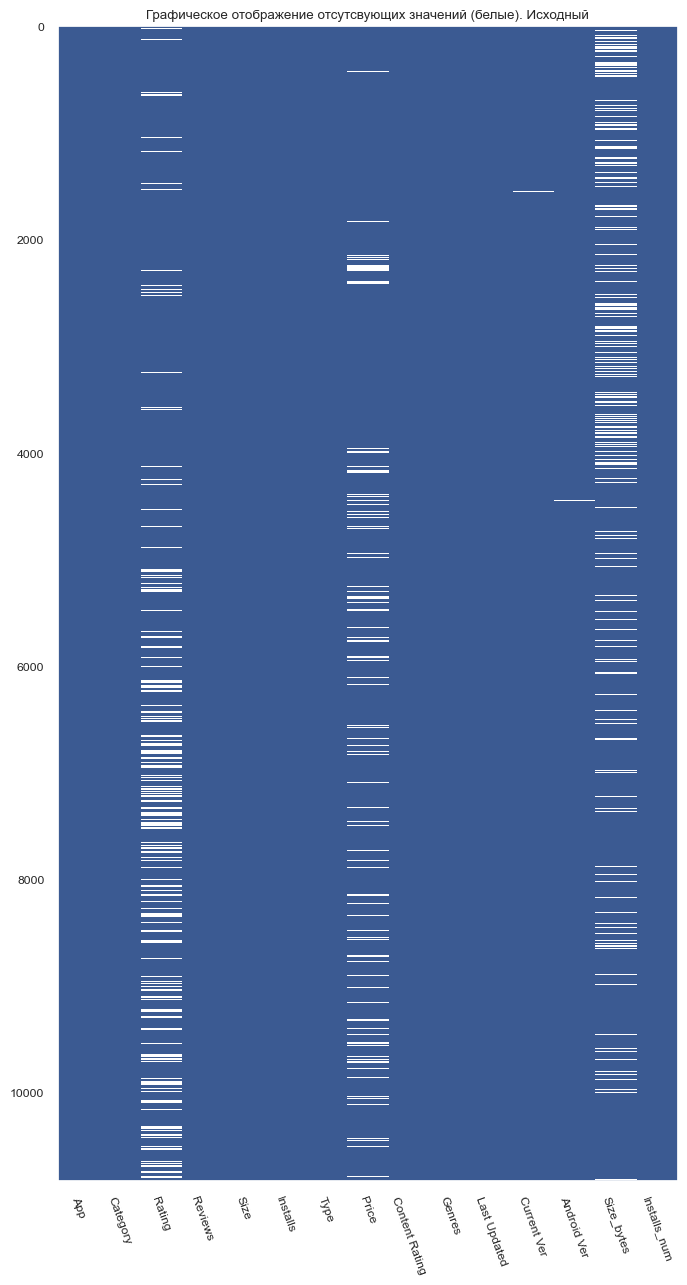

In [161]:
from matplotlib.colors import ListedColormap
def plotTableNA(dataF, addToTilte =""):
    '''  Функция для построения графика отображение отсутсвующих значений'''
    if   len(dataF.columns)> 20:   K = 3
    elif len(dataF.columns)== 1:   K = 1
    else:                          K = 1.7

    figSizeH = 15        # размер полотна, высота
    figSizeW =int(len(dataF.columns)/K) # размер полотна, ширина
    fig, ax = plt.subplots( figsize=(figSizeW, figSizeH)) # создать полотно для рисования, figsize-размер в дюймах

    # отрисовать матрицу значений функцией imshow. Применяется цветовая палитра
    plt.imshow( dataF.isna(),
                cmap = ListedColormap([ '#3B5A92', 'white', ]), # выбор цветовой шкалы, аналог cm.get_cmap('jet'),
                aspect='auto',  # ‘auto’ | ‘equal’ | scalar]    # режим соотнощения сторон
                interpolation= 'none',)                         # отключить размытие
    ax.set_xticks(np.arange(len(dataF.columns)))
    ax.set_xticklabels(dataF.columns, rotation=-70,)
    plt.title("Графическое отображение отсутсвующих значений (белые). "+ addToTilte)
    plt.grid(False) # Сетка
#-------------------------------------
# Вызов функции с указанием параметров
plotTableNA( dataF=df, addToTilte="Исходный" )

In [162]:
print("Размер исходного DataFrame", df.shape)
print("Вар.3.1. Размер при исключении по строкам",  df.dropna(axis='index', how='any').shape)
print("Вар.3.2. Размер при исключении по столбцам", df.dropna(axis='columns', how='any').shape)

Размер исходного DataFrame (10841, 15)
Вар.3.1. Размер при исключении по строкам (7146, 15)
Вар.3.2. Размер при исключении по столбцам (10841, 6)


In [163]:
# Заполняем пропуски медианными значениями
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Size_bytes'] = df['Size_bytes'].fillna(df['Size_bytes'].median())

# Проверим результат
print(df[['Rating', 'Size_bytes']].isna().sum())

Rating        0
Size_bytes    0
dtype: int64


In [164]:
print ("Итого: " + str(df.shape[0]) + " записи, " + str(df.shape[1]) + " столбец (признак).")

Итого: 10841 записи, 15 столбец (признак).


### Замена значений (mapping) + One-Hot encoding

Нужно использовать mapping, потому что иначе информация была бы избыточной (ловушка фиктивных переменных)

In [165]:
df.shape

(10841, 15)

In [166]:
# описание для НЕ числовых значений, при их наличии
if (df.dtypes == 'object').sum() >0:
    print(df.describe(include=['object', 'bool']).T )

                count unique                 top   freq
App             10841   9660              ROBLOX      9
Category        10841     34              FAMILY   1972
Size            10841    462  Varies with device   1695
Installs        10841     22          1,000,000+   1579
Type            10840      3                Free  10039
Content Rating  10840      6            Everyone   8714
Genres          10841    120               Tools    842
Last Updated    10841   1378      August 3, 2018    326
Current Ver     10833   2832  Varies with device   1459
Android Ver     10838     33          4.1 and up   2451


In [167]:
df['Content Rating'].unique() # получить массив уникальных значений в столбце

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [168]:
# применить карту соотвествий имеющихся и новых значений. Тип данных результата - int, т.к. замена на числа
df['Content_Rating_Digit'] = df['Content Rating'].map(
    {
        'Everyone': 0,
        'Everyone 10+': 1,
        'Teen': 2,
        'Mature 17+': 3,
        'Adults only 18+': 4,
        'Unrated': 5
    }
)
df[[ 'Content Rating' , 'Content_Rating_Digit']] [:10]

,Content Rating,Content_Rating_Digit
0,Everyone,0.0
1,Everyone,0.0
2,Everyone,0.0
3,Teen,2.0
4,Everyone,0.0
5,Everyone,0.0
6,Everyone,0.0
7,Everyone,0.0
8,Everyone,0.0
9,Everyone,0.0


In [169]:
df.shape

(10841, 16)

### One-Hot encoding

One-Hot Encoding (OHE) — это метод кодирования категориальных признаков в числовой вид, при котором для каждого уникального значения признака создаётся отдельный бинарный (0/1) столбец.

Модели машинного обучения (линейная регрессия, логистическая регрессия, деревья решений и др.) работают только с числами. OHE позволяет представить категории так, чтобы модель видела их как набор независимых бинарных признаков.

In [170]:
df['Category'].unique() # получить массив уникальных значений в столбце

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [171]:
objColNames    = ['Category'] # названия признаков в исходной таблицы в виде списка
prefixColNames = ['RCategory_N']       # сокращенные названия признаков для новой таблицы в виде списка

df_dummies = pd.get_dummies(
    data   = df[objColNames],  # таблица с признаками для кодирования
    prefix = prefixColNames,   # сокращенные приставки к новым столбцам
    dtype  = int,              # результат сравнения в виде целых чисел {0,1}
)

df = pd.concat([df, df_dummies], axis=1)
df_dummies[:3] # осмотрим перые строки новой таблицы

,RCategory_N_1.9,RCategory_N_ART_AND_DESIGN,RCategory_N_AUTO_AND_VEHICLES,RCategory_N_BEAUTY,RCategory_N_BOOKS_AND_REFERENCE,RCategory_N_BUSINESS,RCategory_N_COMICS,RCategory_N_COMMUNICATION,RCategory_N_DATING,RCategory_N_EDUCATION,...,RCategory_N_PERSONALIZATION,RCategory_N_PHOTOGRAPHY,RCategory_N_PRODUCTIVITY,RCategory_N_SHOPPING,RCategory_N_SOCIAL,RCategory_N_SPORTS,RCategory_N_TOOLS,RCategory_N_TRAVEL_AND_LOCAL,RCategory_N_VIDEO_PLAYERS,RCategory_N_WEATHER
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
df.shape

(10841, 50)

### Удаление нечисловых столбцов

In [173]:
df_numeric = df.select_dtypes(include=['number'])

In [174]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rating                           10841 non-null  float64
 1   Reviews                          10840 non-null  float64
 2   Price                            10040 non-null  float64
 3   Size_bytes                       10841 non-null  float64
 4   Installs_num                     10840 non-null  float64
 5   Content_Rating_Digit             10840 non-null  float64
 6   RCategory_N_1.9                  10841 non-null  int32  
 7   RCategory_N_ART_AND_DESIGN       10841 non-null  int32  
 8   RCategory_N_AUTO_AND_VEHICLES    10841 non-null  int32  
 9   RCategory_N_BEAUTY               10841 non-null  int32  
 10  RCategory_N_BOOKS_AND_REFERENCE  10841 non-null  int32  
 11  RCategory_N_BUSINESS             10841 non-null  int32  
 12  RCategory_N_COMICS

In [175]:
df_numeric = df_numeric.drop('Price', axis=1)

In [176]:
df_numeric.shape

(10841, 39)

In [177]:
# описание для НЕ числовых значений, при их наличии
if (df_numeric.dtypes == 'object').sum() >0:
    print(df_numeric.describe(include=['object', 'bool']).T )

# Формирование тренировочной и проверочной выборок

In [178]:
valid_size = 0.2 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

x_train, x_test, y_train, y_test =  train_test_split(
    df_numeric.drop(columns=['Rating']),  # все столбцы, кроме 'Price'
    df_numeric['Rating'],      # исходные данные y

    test_size = valid_size, # доля тестовой части в выборке
    random_state=rand_seed, # начальное состояние генератора случ. чисел
    shuffle=True            # перемешивание
)

In [179]:
print ("Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(y_test),
    len(x_train)+len(x_test), len(y_train)+len(y_test),
))

Кол-во элементов: 
  x_train: 8672, y_train 8672 
  x_test:  2169, y_test  2169 
  total x: 10841, total y 10841 


In [180]:
x_test[:3]

,Reviews,Size_bytes,Installs_num,Content_Rating_Digit,RCategory_N_1.9,RCategory_N_ART_AND_DESIGN,RCategory_N_AUTO_AND_VEHICLES,RCategory_N_BEAUTY,RCategory_N_BOOKS_AND_REFERENCE,RCategory_N_BUSINESS,...,RCategory_N_PERSONALIZATION,RCategory_N_PHOTOGRAPHY,RCategory_N_PRODUCTIVITY,RCategory_N_SHOPPING,RCategory_N_SOCIAL,RCategory_N_SPORTS,RCategory_N_TOOLS,RCategory_N_TRAVEL_AND_LOCAL,RCategory_N_VIDEO_PLAYERS,RCategory_N_WEATHER
10454,32.0,10171187.2,1000.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4797,1131937.0,42991616.0,100000000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7313,13.0,2621440.0,1000.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Формирование таблицы с строго числовыми значениями

In [181]:
# описание для числовых значений. Оператор ".T" транспонирует матрицу для удобства чтения
x_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Reviews,2169.0,3.580043e+05,2.328379e+06,0.0,43.0,2180.0,55427.0,7.812821e+07
Size_bytes,2169.0,2.167810e+07,2.230356e+07,14336.0,6396313.6,13631488.0,28311552.0,1.048576e+08
Installs_num,2169.0,1.416912e+07,7.675851e+07,0.0,5000.0,100000.0,5000000.0,1.000000e+09
Content_Rating_Digit,2169.0,4.121715e-01,8.738510e-01,0.0,0.0,0.0,0.0,3.000000e+00
RCategory_N_1.9,2169.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
RCategory_N_ART_AND_DESIGN,2169.0,4.610420e-03,6.775899e-02,0.0,0.0,0.0,0.0,1.000000e+00
RCategory_N_AUTO_AND_VEHICLES,2169.0,8.298755e-03,9.073964e-02,0.0,0.0,0.0,0.0,1.000000e+00
RCategory_N_BEAUTY,2169.0,4.149378e-03,6.429670e-02,0.0,0.0,0.0,0.0,1.000000e+00
RCategory_N_BOOKS_AND_REFERENCE,2169.0,2.397418e-02,1.530040e-01,0.0,0.0,0.0,0.0,1.000000e+00
RCategory_N_BUSINESS,2169.0,3.826648e-02,1.918831e-01,0.0,0.0,0.0,0.0,1.000000e+00


# Выбор целевого значения и признаков для анализа данных

In [182]:
train_with_target = pd.concat([x_train, y_train], axis=1)
corr_df = train_with_target.corr(method='pearson')
corr_df

,Reviews,Size_bytes,Installs_num,Content_Rating_Digit,RCategory_N_1.9,RCategory_N_ART_AND_DESIGN,RCategory_N_AUTO_AND_VEHICLES,RCategory_N_BEAUTY,RCategory_N_BOOKS_AND_REFERENCE,RCategory_N_BUSINESS,...,RCategory_N_PHOTOGRAPHY,RCategory_N_PRODUCTIVITY,RCategory_N_SHOPPING,RCategory_N_SOCIAL,RCategory_N_SPORTS,RCategory_N_TOOLS,RCategory_N_TRAVEL_AND_LOCAL,RCategory_N_VIDEO_PLAYERS,RCategory_N_WEATHER,Rating
Reviews,1.000000,0.112056,0.658961,0.057735,NaN,-0.011373,-0.013043,-0.010733,-0.018097,-0.030223,...,0.010141,-0.013288,0.000227,0.088419,-0.016619,-0.010749,-0.012118,0.010473,-0.007524,0.065427
Size_bytes,0.112056,1.000000,0.057458,0.138818,-0.003628,-0.028549,0.001176,-0.019134,-0.045468,-0.061745,...,-0.033474,-0.071528,-0.027351,-0.028977,0.018799,-0.153372,0.002231,-0.032781,-0.029162,0.048605
Installs_num,0.658961,0.057458,1.000000,0.045975,NaN,-0.012541,-0.015438,-0.012532,-0.011739,-0.032803,...,0.034526,0.038703,-0.004006,0.063768,-0.024435,-0.002015,0.018638,0.036837,-0.010171,0.047408
Content_Rating_Digit,0.057735,0.138818,0.045975,1.000000,NaN,-0.025152,-0.037760,-0.001002,-0.022902,-0.083517,...,-0.055056,-0.083608,0.002590,0.225476,-0.046308,-0.123554,-0.059689,-0.010306,-0.032017,0.005091
RCategory_N_1.9,NaN,-0.003628,NaN,NaN,1.000000,-0.000858,-0.000948,-0.000767,-0.001559,-0.002289,...,-0.001895,-0.002136,-0.001654,-0.001804,-0.002064,-0.003112,-0.001654,-0.001415,-0.000955,0.314256
RCategory_N_ART_AND_DESIGN,-0.011373,-0.028549,-0.012541,-0.025152,-0.000858,1.000000,-0.007050,-0.005705,-0.011598,-0.017032,...,-0.014101,-0.015890,-0.012306,-0.013421,-0.015357,-0.023155,-0.012306,-0.010527,-0.007102,0.023904
RCategory_N_AUTO_AND_VEHICLES,-0.013043,0.001176,-0.015438,-0.037760,-0.000948,-0.007050,1.000000,-0.006301,-0.012810,-0.018812,...,-0.015575,-0.017550,-0.013592,-0.014823,-0.016961,-0.025574,-0.013592,-0.011627,-0.007845,0.007388
RCategory_N_BEAUTY,-0.010733,-0.019134,-0.012532,-0.001002,-0.000767,-0.005705,-0.006301,1.000000,-0.010367,-0.015224,...,-0.012604,-0.014203,-0.011000,-0.011996,-0.013727,-0.020697,-0.011000,-0.009410,-0.006349,0.009295
RCategory_N_BOOKS_AND_REFERENCE,-0.018097,-0.045468,-0.011739,-0.022902,-0.001559,-0.011598,-0.012810,-0.010367,1.000000,-0.030950,...,-0.025624,-0.028875,-0.022363,-0.024388,-0.027906,-0.042076,-0.022363,-0.019130,-0.012906,0.041167
RCategory_N_BUSINESS,-0.030223,-0.061745,-0.032803,-0.083517,-0.002289,-0.017032,-0.018812,-0.015224,-0.030950,1.000000,...,-0.037628,-0.042402,-0.032839,-0.035812,-0.040979,-0.061788,-0.032839,-0.028091,-0.018953,-0.005607


Text(0.5, 1.0, 'Матрица корреляции признаков')

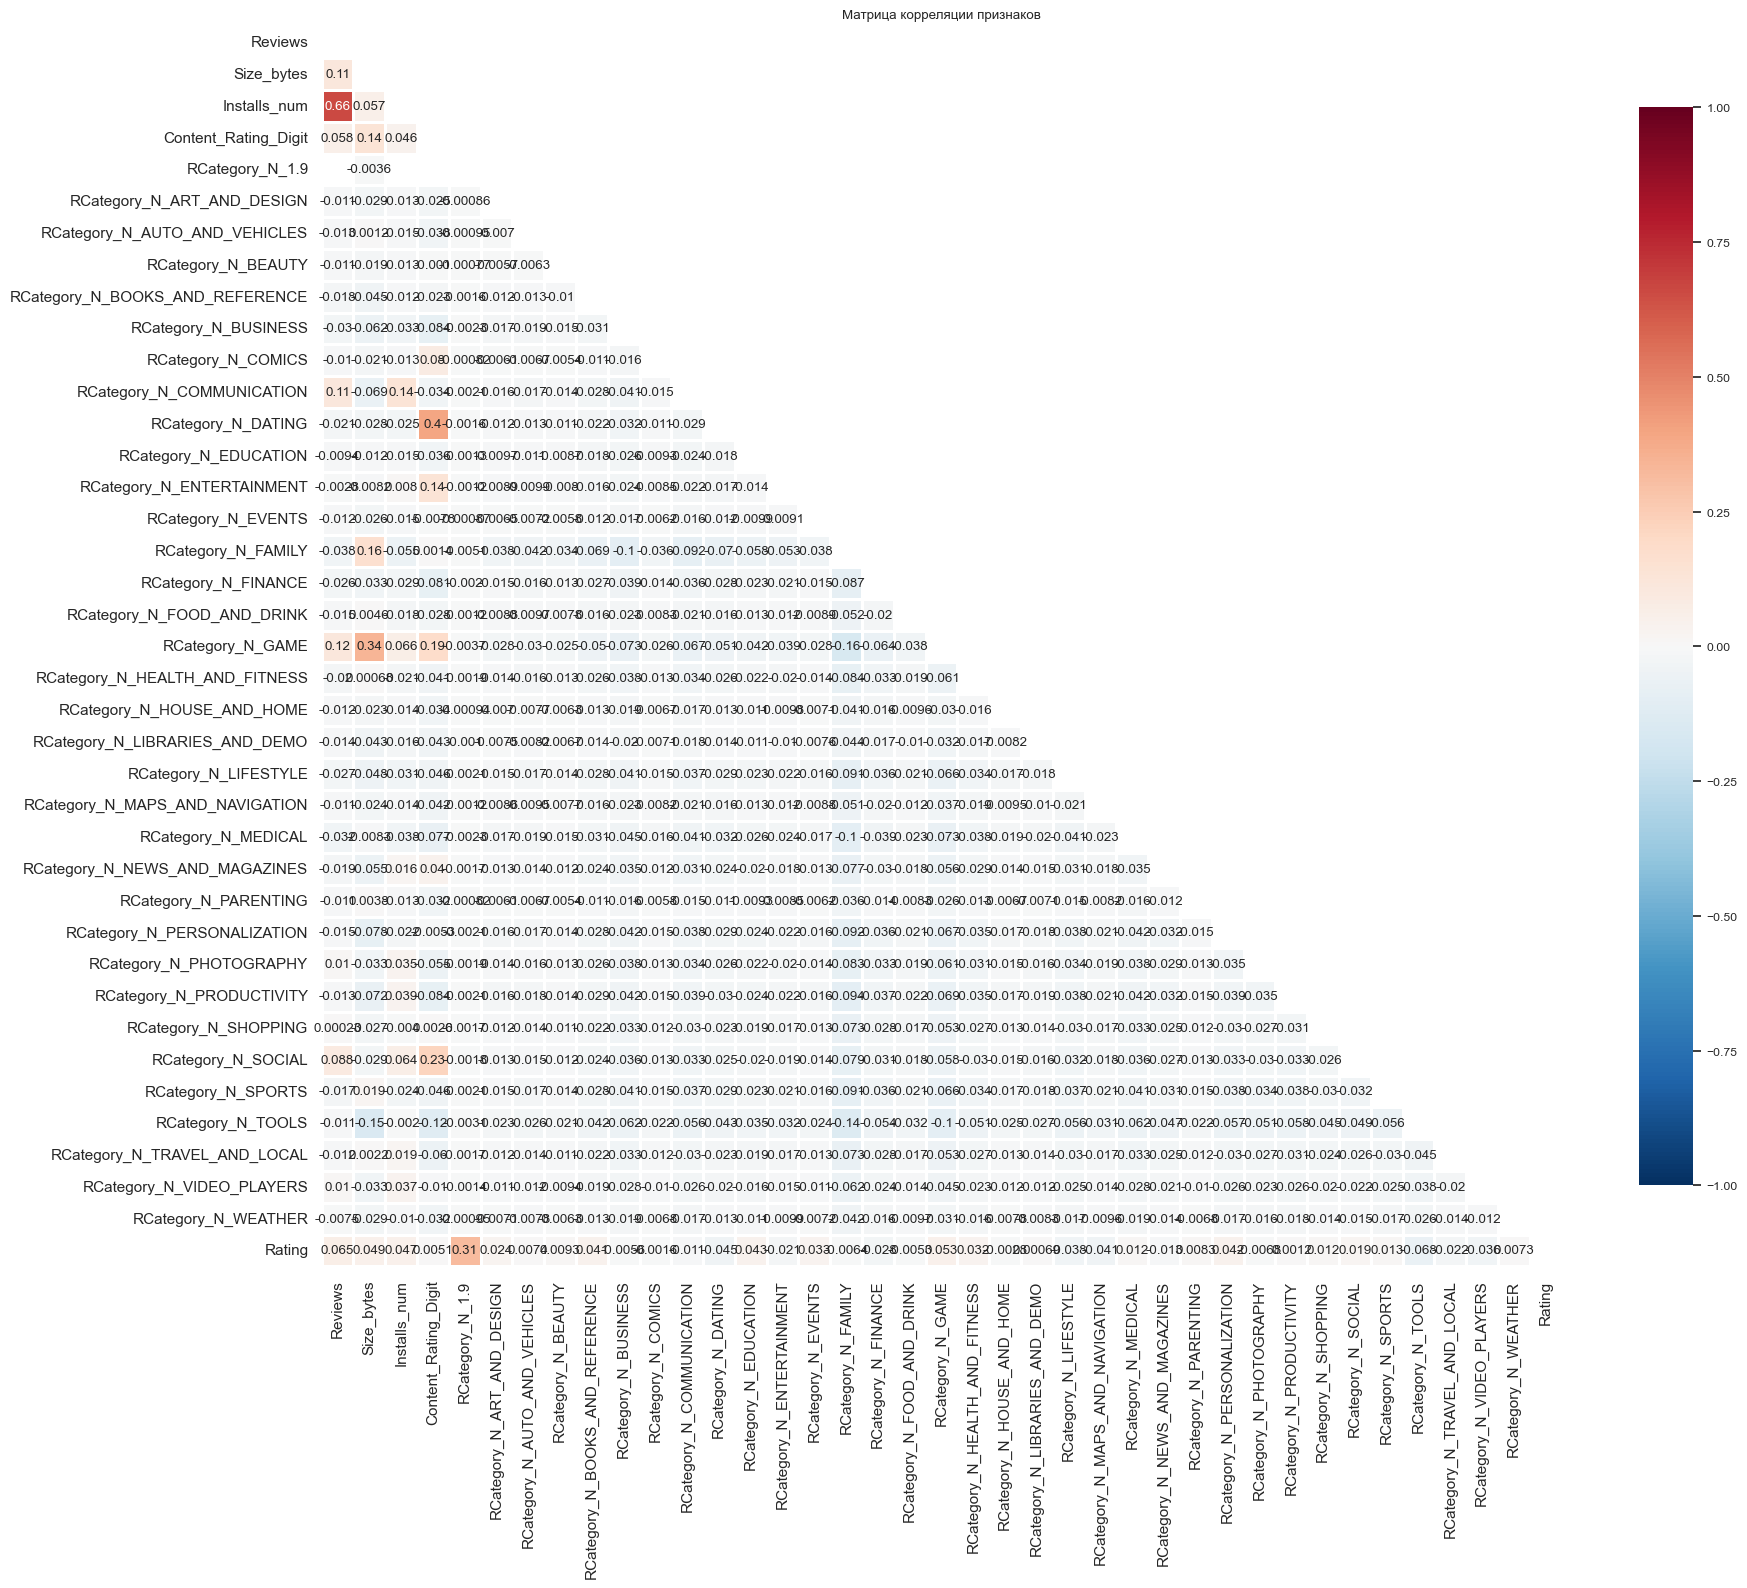

In [183]:
sns.set(style="white")# цвет фона

# построить "маску" для отображения только половины корреляционной матрицы
mask = np.zeros_like(corr_df, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale=0.8) # размер шрифта

# Построить тепловую карту
sns.heatmap(
    ##################
    data=corr_df,   ### <<<- объект-матрица корреляции
    ##################
    vmin=-1, vmax=1, center=0,
    annot=True,
    cmap = 'RdBu_r',
    mask=mask,   # применить маску
    square=True, # форма ячейки - квадрат
    linewidths=1.0, # зазор между ячейки
    cbar_kws={"shrink": .7}  # уменьшить размер легенды
)
plt.title(u'Матрица корреляции признаков')

Получим столбец для целевого признака.

In [184]:
# Последовательное применение операции:
# - получить единственный столбец,
# - получить абсолютные значения,
# - отсортировать
corr_df[['Rating']].abs().sort_values(by="Rating")

,Rating
RCategory_N_LIBRARIES_AND_DEMO,0.000690
RCategory_N_PRODUCTIVITY,0.001208
RCategory_N_COMICS,0.001647
RCategory_N_HOUSE_AND_HOME,0.002775
Content_Rating_Digit,0.005091
RCategory_N_FOOD_AND_DRINK,0.005293
RCategory_N_BUSINESS,0.005607
RCategory_N_FAMILY,0.006414
RCategory_N_PHOTOGRAPHY,0.006817
RCategory_N_WEATHER,0.007316


In [185]:
features_1 = [
    'RCategory_N_1.9',
    'RCategory_N_TOOLS',
    'Reviews',
    'RCategory_N_GAME',
    'RCategory_N_BOOKS_AND_REFERENCE'
]

In [186]:
target   = ['Rating']
features = [column for column in corr_df.columns if column not in target]
features

['Reviews',
 'Size_bytes',
 'Installs_num',
 'Content_Rating_Digit',
 'RCategory_N_1.9',
 'RCategory_N_ART_AND_DESIGN',
 'RCategory_N_AUTO_AND_VEHICLES',
 'RCategory_N_BEAUTY',
 'RCategory_N_BOOKS_AND_REFERENCE',
 'RCategory_N_BUSINESS',
 'RCategory_N_COMICS',
 'RCategory_N_COMMUNICATION',
 'RCategory_N_DATING',
 'RCategory_N_EDUCATION',
 'RCategory_N_ENTERTAINMENT',
 'RCategory_N_EVENTS',
 'RCategory_N_FAMILY',
 'RCategory_N_FINANCE',
 'RCategory_N_FOOD_AND_DRINK',
 'RCategory_N_GAME',
 'RCategory_N_HEALTH_AND_FITNESS',
 'RCategory_N_HOUSE_AND_HOME',
 'RCategory_N_LIBRARIES_AND_DEMO',
 'RCategory_N_LIFESTYLE',
 'RCategory_N_MAPS_AND_NAVIGATION',
 'RCategory_N_MEDICAL',
 'RCategory_N_NEWS_AND_MAGAZINES',
 'RCategory_N_PARENTING',
 'RCategory_N_PERSONALIZATION',
 'RCategory_N_PHOTOGRAPHY',
 'RCategory_N_PRODUCTIVITY',
 'RCategory_N_SHOPPING',
 'RCategory_N_SOCIAL',
 'RCategory_N_SPORTS',
 'RCategory_N_TOOLS',
 'RCategory_N_TRAVEL_AND_LOCAL',
 'RCategory_N_VIDEO_PLAYERS',
 'RCategory_N_W

# Просмотр характеристик выбранных признаков

<Figure size 700x700 with 0 Axes>

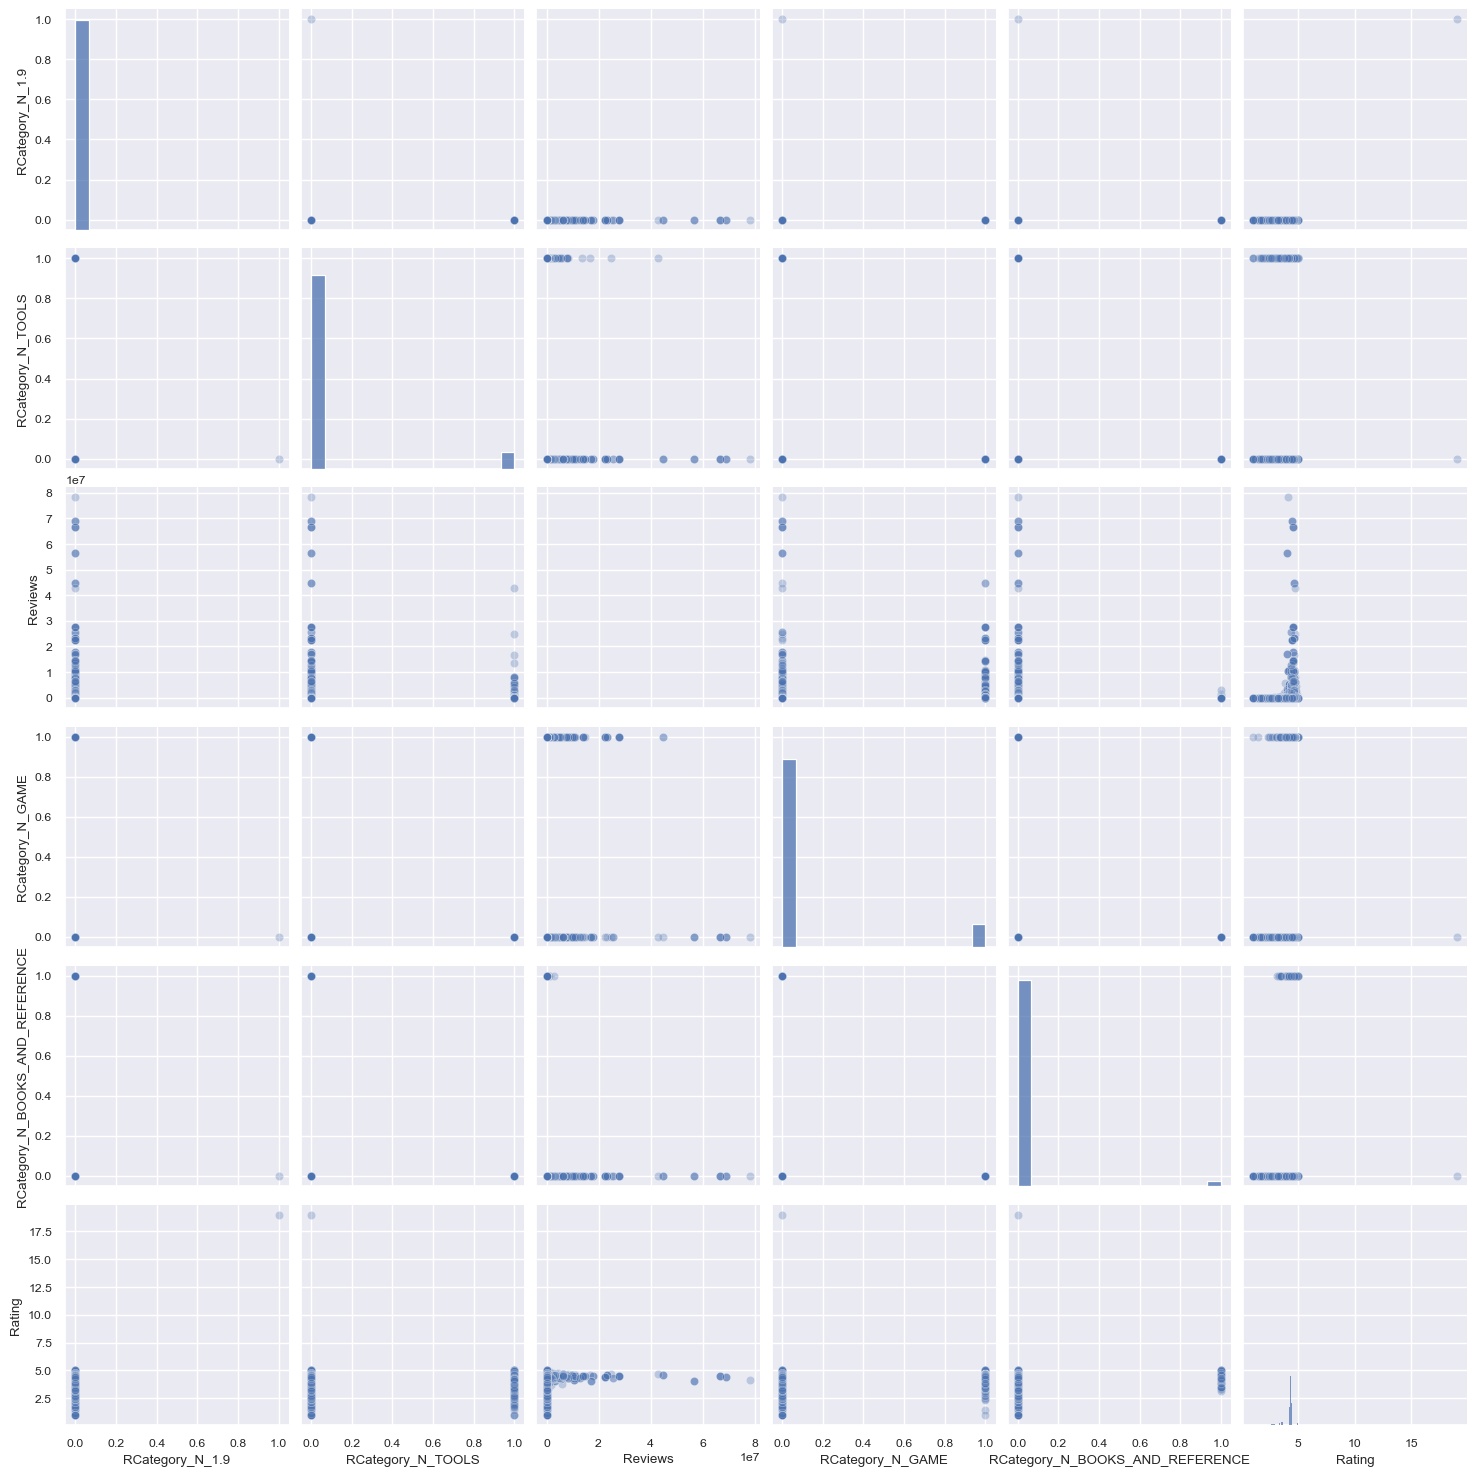

In [187]:
# График признаков попарно
plt.figure(figsize=(7,7))
%config InlineBackend.figure_format = 'png' # формат изображений PNG, для сокращения времени отрисовки графиков

sns.pairplot(
    train_with_target[features_1 + target],
    #hue = 'Type',         # Признак разделения
    kind="scatter",        # Тип даграмм: reg,scatter
    diag_kind = 'hist',     # Тип диагоральных даграмм: hist, kde
    plot_kws={'alpha':0.3} # прозрачность точек
)

# Поиск и обработка выбросов

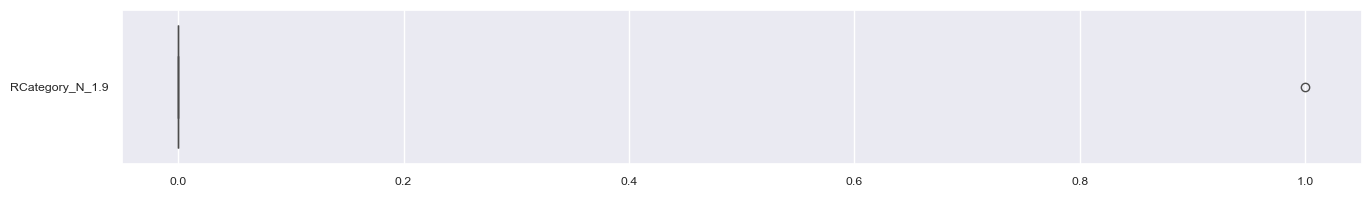

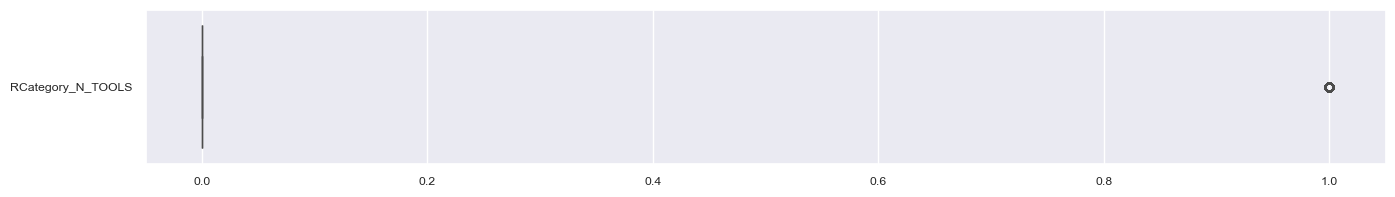

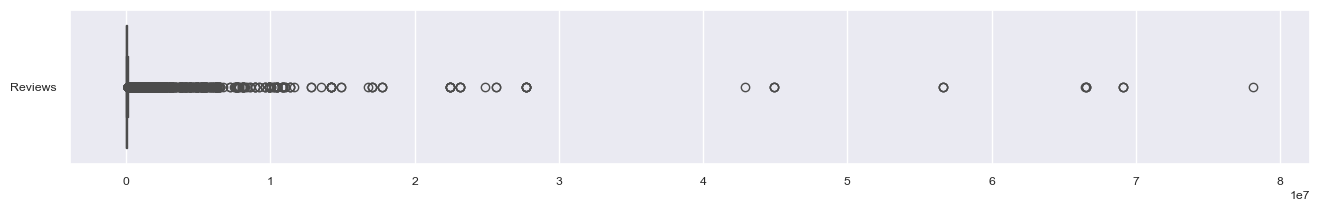

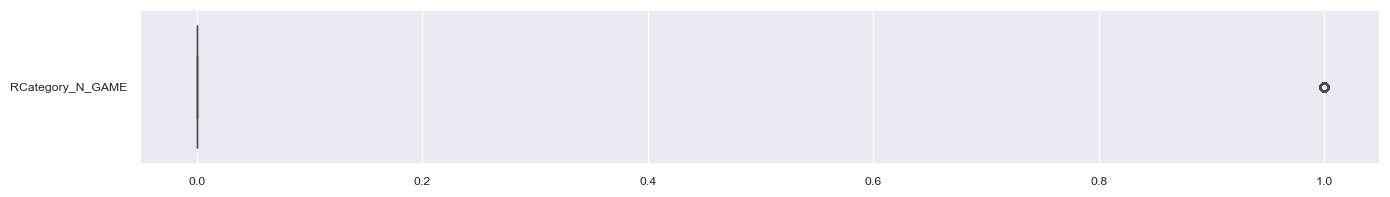

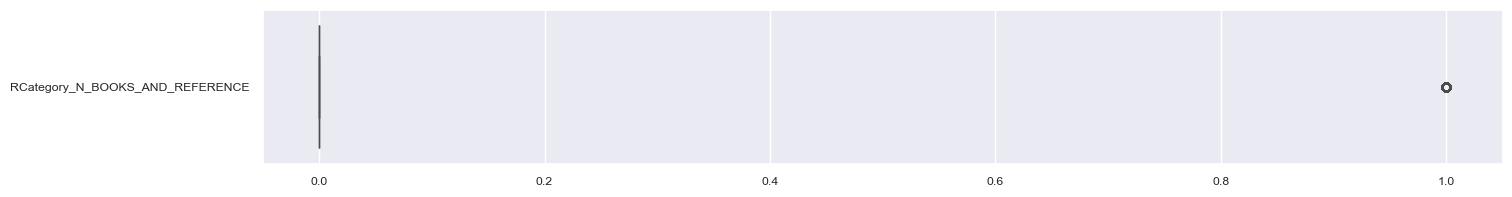

In [188]:
# Цикл: для каждого элемента в объединенном списке
for feature_name in (features_1):

    # Построить полотно для рисования с указанным размером
    plt.figure(figsize=(16,2))

    # На созданном полотне отрисовать boxplot
    sns.boxplot( data=x_train[[feature_name]], # данные
                    orient='h' # ориентация графика
                    )

Установим границы значений, для тех объектов таблицы, которые должны остаться

Межквартильный размах (IQR)
Это мера разброса данных, которая показывает диапазон центральных 50% значений. Он вычисляется по формуле:

IQR=Q3−Q1

Q1 — это первый квартиль (25-й процентиль), значение, ниже которого находится 25% всех данных.

Q3 — это третий квартиль (75-й процентиль), значение, ниже которого находится 75% всех данных.

Формулы для усов и выбросов
Наиболее распространённый метод построения усов (метод Тьюки) основан на IQR. Он помогает выявить потенциальные выбросы, то есть значения, которые значительно отличаются от основной массы данных.

Формулы для границ:

Нижняя граница уса: Q1−1.5×IQR

Верхняя граница уса: Q3+1.5×IQR

Как это работает:

Нижний ус простирается от Q1 до самого маленького значения в наборе данных, которое больше или равно нижней границе. Если таких значений нет, то ус доходит до минимального значения в наборе.

Верхний ус простирается от Q3 до самого большого значения, которое меньше или равно верхней границе. Если таких значений нет, то ус доходит до максимального значения.

In [189]:
train_with_target.describe()

,Reviews,Size_bytes,Installs_num,Content_Rating_Digit,RCategory_N_1.9,RCategory_N_ART_AND_DESIGN,RCategory_N_AUTO_AND_VEHICLES,RCategory_N_BEAUTY,RCategory_N_BOOKS_AND_REFERENCE,RCategory_N_BUSINESS,...,RCategory_N_PHOTOGRAPHY,RCategory_N_PRODUCTIVITY,RCategory_N_SHOPPING,RCategory_N_SOCIAL,RCategory_N_SPORTS,RCategory_N_TOOLS,RCategory_N_TRAVEL_AND_LOCAL,RCategory_N_VIDEO_PLAYERS,RCategory_N_WEATHER,Rating
count,8.671000e+03,8.672000e+03,8.671000e+03,8671.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,...,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000
mean,4.657025e+05,2.103582e+07,1.578833e+07,0.398455,0.000115,0.006342,0.007726,0.005074,0.020641,0.043473,...,0.030212,0.038054,0.023178,0.027445,0.035632,0.077491,0.023178,0.017066,0.007841,4.206930
std,3.059124e+06,2.191682e+07,8.697649e+07,0.861475,0.010738,0.079390,0.087563,0.071054,0.142188,0.203932,...,0.171181,0.191337,0.150477,0.163385,0.185381,0.267384,0.150477,0.129526,0.088208,0.505551
min,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.650000e+01,6.186598e+06,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.100000
50%,2.079000e+03,1.363149e+07,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.300000
75%,5.438800e+04,2.621440e+07,5.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000
max,7.815831e+07,1.048576e+08,1.000000e+09,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000


In [190]:
# создадим "словарь"/"хэш-таблицу" для удобного обращения, где ключ - это название признака
cols = features + target


for col in cols:
        Q1 = train_with_target[col].quantile(0.25)
        Q3 = train_with_target[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 3 * IQR #более мягкие границы: вместо 1.5 * IQR берём 3 * IQR.

        print(f"{col} = ({lower:.2f}, {upper:.2f})")

Reviews = (-81490.75, 217442.50)
Size_bytes = (-23855104.00, 86297804.80)
Installs_num = (-7497500.00, 19997000.00)
Content_Rating_Digit = (0.00, 0.00)
RCategory_N_1.9 = (0.00, 0.00)
RCategory_N_ART_AND_DESIGN = (0.00, 0.00)
RCategory_N_AUTO_AND_VEHICLES = (0.00, 0.00)
RCategory_N_BEAUTY = (0.00, 0.00)
RCategory_N_BOOKS_AND_REFERENCE = (0.00, 0.00)
RCategory_N_BUSINESS = (0.00, 0.00)
RCategory_N_COMICS = (0.00, 0.00)
RCategory_N_COMMUNICATION = (0.00, 0.00)
RCategory_N_DATING = (0.00, 0.00)
RCategory_N_EDUCATION = (0.00, 0.00)
RCategory_N_ENTERTAINMENT = (0.00, 0.00)
RCategory_N_EVENTS = (0.00, 0.00)
RCategory_N_FAMILY = (0.00, 0.00)
RCategory_N_FINANCE = (0.00, 0.00)
RCategory_N_FOOD_AND_DRINK = (0.00, 0.00)
RCategory_N_GAME = (0.00, 0.00)
RCategory_N_HEALTH_AND_FITNESS = (0.00, 0.00)
RCategory_N_HOUSE_AND_HOME = (0.00, 0.00)
RCategory_N_LIBRARIES_AND_DEMO = (0.00, 0.00)
RCategory_N_LIFESTYLE = (0.00, 0.00)
RCategory_N_MAPS_AND_NAVIGATION = (0.00, 0.00)
RCategory_N_MEDICAL = (0.00, 0.

In [191]:
# создадим "словарь"/"хэш-таблицу" для удобного обращения, где ключ - это название признака
tressholdDict = {
    'Reviews'                     : (0,1_000_000),
    'Size_bytes'                      : (0,86_612_377),
    'Installs_num'               : (0, 19_997_000)
}

print (tressholdDict)

{'Reviews': (0, 1000000), 'Size_bytes': (0, 86612377), 'Installs_num': (0, 19997000)}


Проверим, какая часть данных выходит за пределы границ значений

In [192]:
# Цикл: для каждого элемента в словаре/хэш-таблице пройтись по ключам - названиям признаков
for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0] # извлечь нижнее пороговое
    tresshMax =  tressholdDict[feature_name][1] # извлечь верхнее пороговое

    # Получить кол-во эл. вне пороговых значений. Прием - фильтрация
    over_count = len(  train_with_target[
                            ~((train_with_target[feature_name] >= threesMin ) & (train_with_target[feature_name] <= tresshMax)) # фильтр по двум границам. ~ инверсия логических значений
                            ]
                    )

    dcount = train_with_target[feature_name].count() # кол-во эл. общее

    print ('''{}. Принимаем пороговые значение равными {}.
        Кол-во эл. вне пороговых - {} из {} значение(ий) ({:.1%})\n'''.format(
        feature_name,
        tressholdDict[feature_name],
        over_count,
        dcount,
        over_count/ dcount,
    ))

Reviews. Принимаем пороговые значение равными (0, 1000000).
        Кол-во эл. вне пороговых - 569 из 8671 значение(ий) (6.6%)

Size_bytes. Принимаем пороговые значение равными (0, 86612377).
        Кол-во эл. вне пороговых - 235 из 8672 значение(ий) (2.7%)

Installs_num. Принимаем пороговые значение равными (0, 19997000).
        Кол-во эл. вне пороговых - 672 из 8671 значение(ий) (7.7%)



In [193]:
def filter_outliers(df, tressholdDict, exclude_cols=None):
    """
    Фильтрует DataFrame по заданным границам из словаря tressholdDict.
    exclude_cols — список столбцов, которые не участвуют в фильтрации,
    но сохраняются в итоговой таблице.
    """
    if exclude_cols is None:
        exclude_cols = []

    df_filtered = df.copy()
    initial_len = len(df_filtered)

    for feature_name, (th_min, th_max) in tressholdDict.items():
        if feature_name in df_filtered.columns and feature_name not in exclude_cols:
            df_filtered = df_filtered[
                (df_filtered[feature_name] >= th_min) & 
                (df_filtered[feature_name] <= th_max)
            ]
            print(f"Обработан {feature_name}")

    print(f"Отброшено {initial_len - len(df_filtered)} строк. Осталось {len(df_filtered)} строк.")
    return df_filtered

In [194]:
# train_with_target
train_with_target_filtered = filter_outliers(train_with_target, tressholdDict)

# test с целевой переменной
test_with_target = pd.concat([x_test, y_test], axis=1)

# фильтрация train
train_with_target_filtered = filter_outliers(train_with_target, tressholdDict)

# фильтрация test
test_with_target_filtered = filter_outliers(test_with_target, tressholdDict)

# если нужно отдельно только X без целевой:
x_train_filtered = train_with_target_filtered.drop(columns=['Rating'])
y_train_filtered = train_with_target_filtered['Rating']

x_test_filtered = test_with_target_filtered.drop(columns=['Rating'])
y_test_filtered = test_with_target_filtered['Rating']


Обработан Reviews
Обработан Size_bytes
Обработан Installs_num
Отброшено 917 строк. Осталось 7755 строк.
Обработан Reviews
Обработан Size_bytes
Обработан Installs_num
Отброшено 917 строк. Осталось 7755 строк.
Обработан Reviews
Обработан Size_bytes
Обработан Installs_num
Отброшено 232 строк. Осталось 1937 строк.


RCategory_N_1.9 0 0
RCategory_N_TOOLS 0 1
Reviews 0.0 995002.0
RCategory_N_GAME 0 1
RCategory_N_BOOKS_AND_REFERENCE 0 1
Rating 1.0 5.0


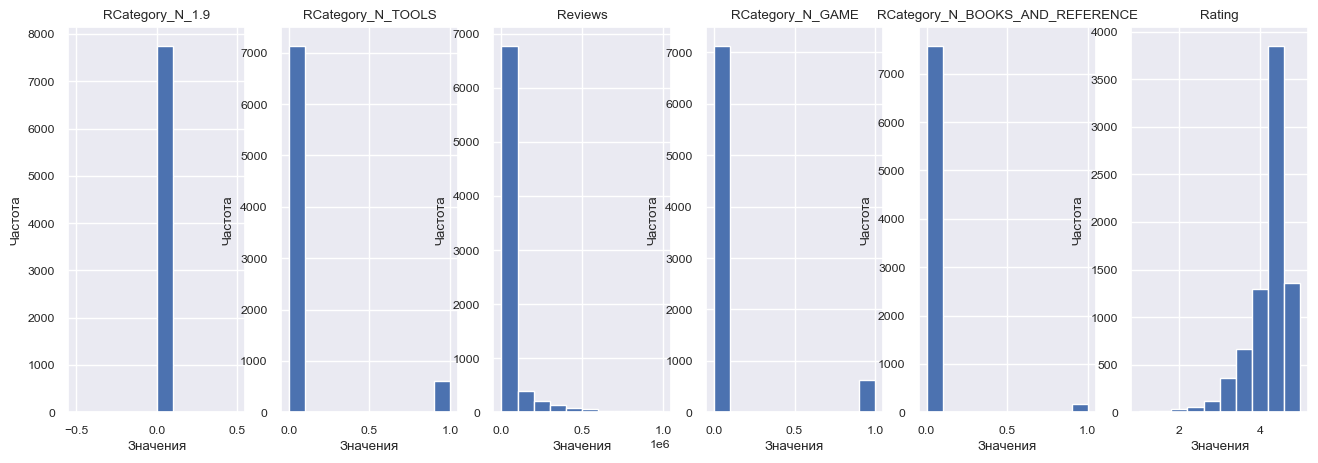

In [195]:
# Строим гистограммы по каждому признаку:
# data[features].hist() #Упрощенный вывод графиков

plt.figure(figsize=(16, 5))
plot_number = 0

for feature_name in (features_1+target):
    plot_number += 1

    plt.subplot(1, len(features_1+target), plot_number)

    plt.hist(train_with_target_filtered[feature_name]) # Построение гистрограммы

    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print (feature_name,
            train_with_target_filtered[feature_name].min(),
            train_with_target_filtered[feature_name].max())

# Построение модели 1

In [196]:
model_lin = linear_model.LinearRegression()

In [197]:
y_train_filtered

4189     4.3
2335     4.2
9126     4.7
878      4.3
7981     4.3
        ... 
2181     4.4
10601    4.2
2033     3.9
9556     4.4
4547     3.2
Name: Rating, Length: 7755, dtype: float64

In [198]:
# Вычислить коэфф. Ki в функции y(x)=Ki*xi + .... + B
# на тренировочном наборе, т.е. обучить модель
model_lin.fit(
    x_train_filtered[features],
    y_train_filtered
)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [199]:
# Получить вычисленные(predicted) зн. на проверочном наборе
# y_pred = fittedModel.predict(x_test)
y_predicted_lin = model_lin.predict(x_test_filtered[features])

In [200]:
# Получаем коэффициенты и свободный член
intercept = model_lin.intercept_
coeffs = model_lin.coef_
feature_names = features # Ваш список признаков

# Формируем уравнение
equation = f"Rating = {intercept:.4f}"
for i, coef in enumerate(coeffs):
    equation += f" + ({coef:.4f} * {feature_names[i]})"
    
print("Уравнение регрессии:")
print(equation)

# Для наглядности можно вывести в виде таблицы
print("\nКоэффициенты модели:")
print(pd.DataFrame(coeffs, feature_names, columns=['Coefficient']))

Уравнение регрессии:
Rating = 4.1848 + (0.0000 * Reviews) + (-0.0000 * Size_bytes) + (-0.0000 * Installs_num) + (-0.0080 * Content_Rating_Digit) + (-0.0000 * RCategory_N_1.9) + (0.1607 * RCategory_N_ART_AND_DESIGN) + (0.0676 * RCategory_N_AUTO_AND_VEHICLES) + (0.0919 * RCategory_N_BEAUTY) + (0.1427 * RCategory_N_BOOKS_AND_REFERENCE) + (0.0049 * RCategory_N_BUSINESS) + (0.0037 * RCategory_N_COMICS) + (-0.0735 * RCategory_N_COMMUNICATION) + (-0.1242 * RCategory_N_DATING) + (0.1594 * RCategory_N_EDUCATION) + (-0.1325 * RCategory_N_ENTERTAINMENT) + (0.2303 * RCategory_N_EVENTS) + (-0.0107 * RCategory_N_FAMILY) + (-0.0735 * RCategory_N_FINANCE) + (-0.0252 * RCategory_N_FOOD_AND_DRINK) + (0.0027 * RCategory_N_GAME) + (0.0818 * RCategory_N_HEALTH_AND_FITNESS) + (-0.0162 * RCategory_N_HOUSE_AND_HOME) + (0.0163 * RCategory_N_LIBRARIES_AND_DEMO) + (-0.0850 * RCategory_N_LIFESTYLE) + (-0.1915 * RCategory_N_MAPS_AND_NAVIGATION) + (0.0506 * RCategory_N_MEDICAL) + (-0.0298 * RCategory_N_NEWS_AND_MAG

## Функции для построения графиков

In [201]:
def PLOTSCATTER(x_train, y_train, x_test, y_test, y_pred, target_name="Price") -> None:
    '''
    Функция построения графиков
    :param x_train: тренировочные признаки (один столбец)
    :param y_train: тренировочные значения целевой переменной
    :param x_test: проверочные признаки (один столбец)
    :param y_test: проверочные значения целевой переменной
    :param y_pred: предсказанные значения целевой переменной
    :param model: обученная модель (LinearRegression)
    :param target_name: название целевой переменной для подписи оси
    '''
    plt.figure(figsize=(15, 5))

    # Точечные диаграммы
    plt.scatter(x_train, y_train, alpha=0.3, label='Тренировочный')
    plt.scatter(x_test, y_test, alpha=0.3, label='Проверочный')

    # --- Исправленная часть для линии регрессии ---
    # Создаем отсортированный набор данных для плавной линии
    sorted_zip = sorted(zip(x_test.values, y_pred))
    x_test_sorted, y_pred_sorted = zip(*sorted_zip)

    plt.plot( # Используем plot вместо scatter
        x_test_sorted, y_pred_sorted,
        lw=3, color='red',
        label=f"Линия регрессии"
    )
    # --- Конец исправления ---

    plt.grid(True)
    plt.legend(loc="best")
    plt.xlabel(x_train.columns[0])
    plt.ylabel(target_name)
    plt.title('График разброса и линия регрессии')
    plt.show()

def PLOTHIST(y_test, y_pred) -> None:
    '''
    Функция построения графиков
    :param y_test: - проверочные значения целевой переменной
    :param y_pred: - вычисленные значения целевой переменной
    '''
    plt.figure(figsize=(6,4))

    # Гистограмма и Плотность распределения - sns.distplot
    # data = y_true - y_pred
    sns.histplot( data = y_test - y_pred,
                color="red",
                kde=True, # оценка плотности в виде кривой
                stat="density",# density: общая площадь равна 1
                )

    # Осевая линия
    # plt.plot(
    #     [0, 0],
    #     [0, 10 * pow(10,-7)], '--', lw=2, c='r')

    plt.ylabel(u'Плотность')
    plt.xlabel(u'Значение ошибки')
    plt.title(u'Плотность распределения и гистограмма ошибок');
    plt.show()

def PLOT34(y_test, y_pred) -> None:
    '''
    Функция построения графиков
    :param y_test: - проверочные значения целевой переменной
    :param y_pred: - вычисленные значения целевой переменной
    '''
    plt.figure(figsize=(12,6))

    # == Диаграмма рассеяния вычисленных значений ==
    # создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс текущего полотна в сетке
    plt.subplot(121)
    plt.scatter(y_test, y_pred,  alpha=0.1, color = "#17becf")
    plt.plot(  [ np.min(y_test), np.max(y_test) ], # x1,x2
               [ np.min(y_test), np.max(y_test) ], # y1,y2
               '--',
               alpha=0.7, lw=3, color = "black")
    plt.title('Диаграмма рассеяния вычисленных значений');
    plt.xlabel('Проверочное Y')
    plt.ylabel('Вычисленное Y')
    plt.grid(True)  # Сетка. Доп параметры color='black', linewidth=0.7

    # == Диаграмма рассеяния ошибок ==
    # создать второе полотно 121: 1-строк, 2-столбцов, 2-индекс текущего полотна в сетке
    plt.subplot(122)
    plt.scatter(y_test, (y_test - y_pred)**2,  alpha=0.1, color = "#17becf")
    plt.title('Диаграмма рассеяния квадрата абсолютной ошибки')
    plt.xlabel('Проверочное Y')
    plt.ylabel('Квадрат абсолютной ошибки')
    plt.grid(True)  # Сетка. Доп параметры color='black', linewidth=0.7
#--------------------------------------------------------------------------

def GET_METRICS_SINGLE(y_test, y_pred):
    """
    Вычисляет и выводит широкий спектр метрик регрессии.
    
    :param y_test: Истинные значения.
    :param y_pred: Предсказанные значения.
    """
    print("------ Метрики качества регрессии ------")
    
    # Основные метрики
    mae  = metrics.mean_absolute_error        (y_test, y_pred)
    mse  = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = metrics.r2_score                   (y_test, y_pred)
    
    print(f"MAE (Mean Absolute Error): {metrics.mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MSE (Mean Squared Error): {metrics.mean_squared_error(y_test, y_pred):.4f}")
    print(f"RMSE (Root Mean Squared Error): {metrics.root_mean_squared_error(y_test, y_pred):.4f}")
    print(f"R2 (Coefficient of Determination): {metrics.r2_score(y_test, y_pred):.4f}")
    
    print("\n------ Дополнительные метрики ------")
    print(f"Explained Variance Score: {metrics.explained_variance_score(y_test, y_pred):.4f}")
    print(f"Max Error: {metrics.max_error(y_test, y_pred):.4f}")
    print(f"Median Absolute Error: {metrics.median_absolute_error(y_test, y_pred):.4f}")
    
    # Метрики на основе различных девиансов (отклонений)
    print(f"Mean Poisson Deviance: {metrics.mean_poisson_deviance(y_test, y_pred):.4f}")
    print(f"Mean Gamma Deviance: {metrics.mean_gamma_deviance(y_test, y_pred):.4f}")
    
    # Процентная ошибка
    print(f"Mean Absolute Percentage Error (MAPE): {metrics.mean_absolute_percentage_error(y_test, y_pred):.4f}")

    # Метрики D^2 (коэффициент детерминации для конкретных функций потерь)
    print(f"D2 Absolute Error Score: {metrics.d2_absolute_error_score(y_test, y_pred):.4f}")
    
    # Некоторые метрики могут выдавать ошибку, если предсказания отрицательные, а y_test - нет.
    # Добавим проверку.
    if (y_pred >= 0).all():
        try:
            print(f"Mean Squared Log Error: {metrics.mean_squared_log_error(y_test, y_pred):.4f}")
        except ValueError as e:
            print(f"Не удалось посчитать Mean Squared Log Error: {e}")
    else:
        print("Пропускаем *Log* метрики, т.к. есть отрицательные предсказания.")
    
    # Метрики D2 Tweedie и Pinball Score требуют доп. параметров, поэтому они сложнее в простом вызове
    # D2 Pinball Score (пример для медианы, alpha=0.5)
    print(f"D2 Pinball Score (alpha=0.5): {metrics.d2_pinball_score(y_test, y_pred, alpha=0.5):.4f}")
    # D2 Tweedie Score (пример для power=2, что эквивалентно Gamma deviance)
    print(f"D2 Tweedie Score (power=2): {metrics.d2_tweedie_score(y_test, y_pred, power=2):.4f}")
    return {"MAE":mae, "MSE":mse, "RMSE":rmse, "R2":r2}
#--------------------------------------------------------------------------

### Графики для модели 1

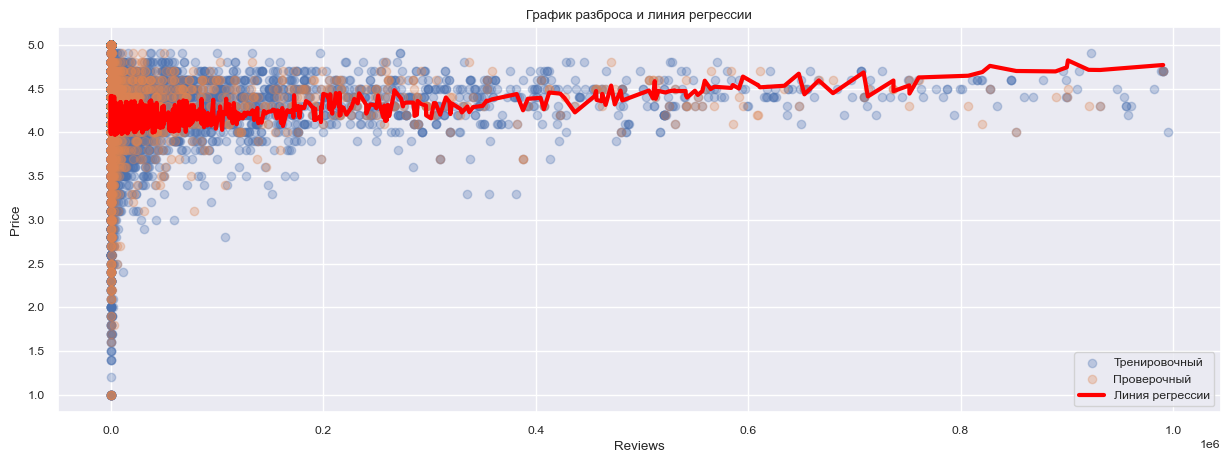

In [202]:
PLOTSCATTER(
    x_train = x_train_filtered[['Reviews']],
    y_train = y_train_filtered,
    x_test = x_test_filtered[['Reviews']],
    y_test = y_test_filtered,
    y_pred = y_predicted_lin
)

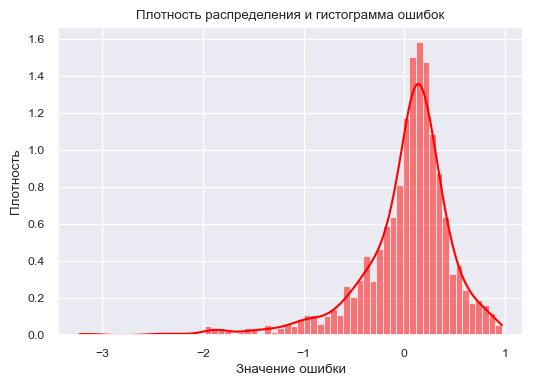

In [203]:
PLOTHIST(
    y_test = y_test_filtered,
    y_pred = y_predicted_lin
)

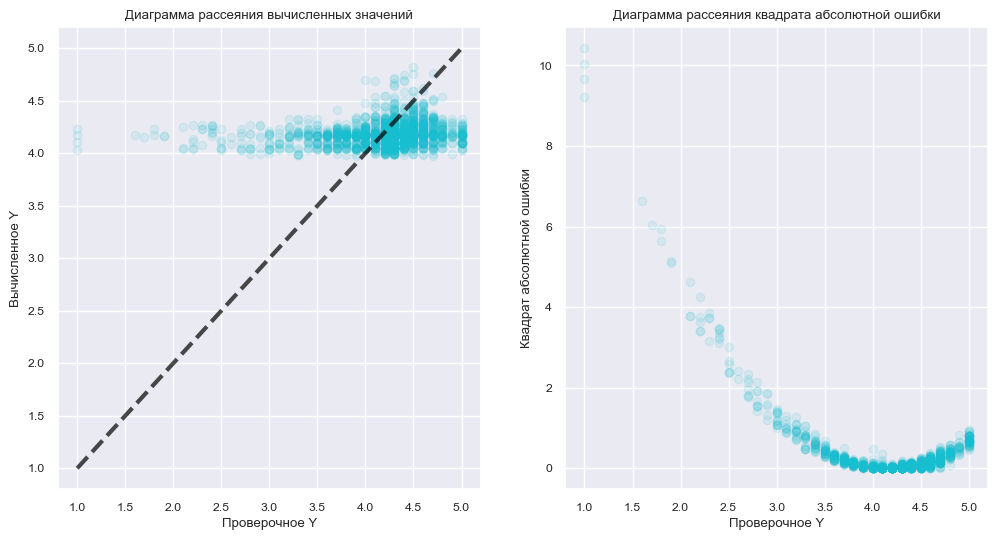

In [204]:
PLOT34(
    y_test = y_test_filtered,
    y_pred = y_predicted_lin
)

In [205]:
GET_METRICS_SINGLE(
    y_test = y_test_filtered,
    y_pred = y_predicted_lin
)

------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.3344
MSE (Mean Squared Error): 0.2399
RMSE (Root Mean Squared Error): 0.4898
R2 (Coefficient of Determination): 0.0288

------ Дополнительные метрики ------
Explained Variance Score: 0.0291
Max Error: 3.2292
Median Absolute Error: 0.2349
Mean Poisson Deviance: 0.0641
Mean Gamma Deviance: 0.0178
Mean Absolute Percentage Error (MAPE): 0.0948
D2 Absolute Error Score: -0.0746
Mean Squared Log Error: 0.0119
D2 Pinball Score (alpha=0.5): -0.0746
D2 Tweedie Score (power=2): 0.0226


{'MAE': 0.3343571572090125,
 'MSE': 0.23994581609538101,
 'RMSE': 0.48984264421891754,
 'R2': 0.028800124632866186}

### Модель 2

In [206]:
# Создание объекта для преобразования в полином 2-й степени
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)

In [207]:
# Преобразование данных
x_train_poly = poly_transformer.fit_transform(x_train_filtered[features])
x_test_poly = poly_transformer.transform(x_test_filtered[features])

In [208]:
print(f"Исходное количество признаков: {x_train_filtered[features].shape[1]}")
print(f"Количество признаков после преобразования: {x_train_poly.shape[1]}")

Исходное количество признаков: 38
Количество признаков после преобразования: 779


In [209]:
new_feature_names = poly_transformer.get_feature_names_out(features)
print("Новые признаки:", new_feature_names)

Новые признаки: ['Reviews' 'Size_bytes' 'Installs_num' 'Content_Rating_Digit'
 'RCategory_N_1.9' 'RCategory_N_ART_AND_DESIGN'
 'RCategory_N_AUTO_AND_VEHICLES' 'RCategory_N_BEAUTY'
 'RCategory_N_BOOKS_AND_REFERENCE' 'RCategory_N_BUSINESS'
 'RCategory_N_COMICS' 'RCategory_N_COMMUNICATION' 'RCategory_N_DATING'
 'RCategory_N_EDUCATION' 'RCategory_N_ENTERTAINMENT' 'RCategory_N_EVENTS'
 'RCategory_N_FAMILY' 'RCategory_N_FINANCE' 'RCategory_N_FOOD_AND_DRINK'
 'RCategory_N_GAME' 'RCategory_N_HEALTH_AND_FITNESS'
 'RCategory_N_HOUSE_AND_HOME' 'RCategory_N_LIBRARIES_AND_DEMO'
 'RCategory_N_LIFESTYLE' 'RCategory_N_MAPS_AND_NAVIGATION'
 'RCategory_N_MEDICAL' 'RCategory_N_NEWS_AND_MAGAZINES'
 'RCategory_N_PARENTING' 'RCategory_N_PERSONALIZATION'
 'RCategory_N_PHOTOGRAPHY' 'RCategory_N_PRODUCTIVITY'
 'RCategory_N_SHOPPING' 'RCategory_N_SOCIAL' 'RCategory_N_SPORTS'
 'RCategory_N_TOOLS' 'RCategory_N_TRAVEL_AND_LOCAL'
 'RCategory_N_VIDEO_PLAYERS' 'RCategory_N_WEATHER' 'Reviews^2'
 'Reviews Size_bytes' '

In [210]:
model_poly = linear_model.LinearRegression()

In [211]:
model_poly.fit(x_train_poly, y_train_filtered)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [212]:
# Получить вычисленные(predicted) зн. на проверочном наборе
# y_pred = fittedModel.predict(x_test)
y_predicted_poly = model_poly.predict(x_test_poly)

### Графики для 2 модели

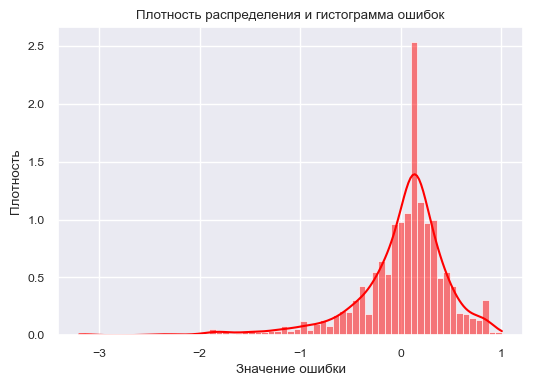

In [213]:
PLOTHIST(
    y_test = y_test_filtered,
    y_pred = y_predicted_poly
)

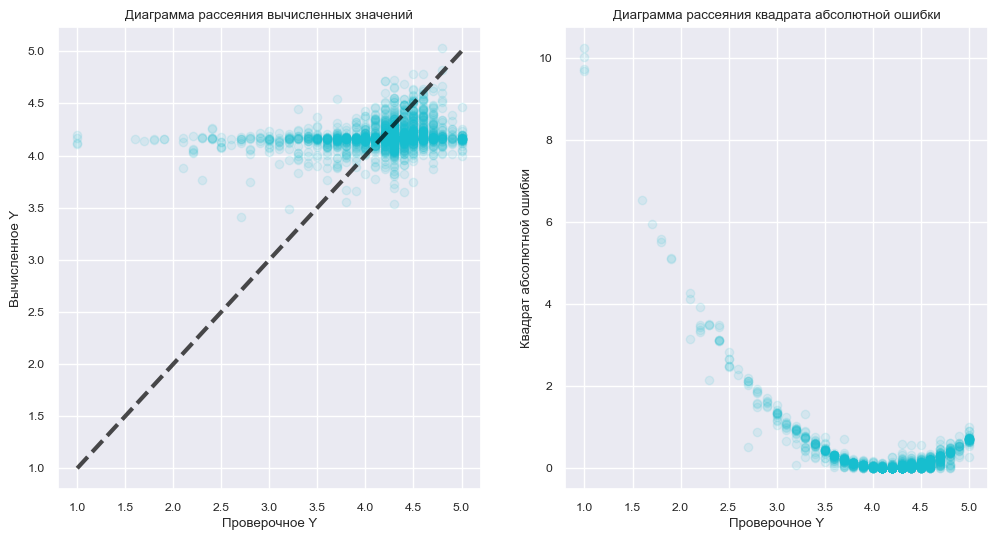

In [214]:
PLOT34(
    y_test = y_test_filtered,
    y_pred = y_predicted_poly
)

In [215]:
GET_METRICS_SINGLE(
    y_test = y_test_filtered,
    y_pred = y_predicted_poly
)

------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.3314
MSE (Mean Squared Error): 0.2355
RMSE (Root Mean Squared Error): 0.4852
R2 (Coefficient of Determination): 0.0470

------ Дополнительные метрики ------
Explained Variance Score: 0.0475
Max Error: 3.1978
Median Absolute Error: 0.2263
Mean Poisson Deviance: 0.0630
Mean Gamma Deviance: 0.0176
Mean Absolute Percentage Error (MAPE): 0.0939
D2 Absolute Error Score: -0.0650
Mean Squared Log Error: 0.0117
D2 Pinball Score (alpha=0.5): -0.0650
D2 Tweedie Score (power=2): 0.0364


{'MAE': 0.3313762360826008,
 'MSE': 0.2354566020764576,
 'RMSE': 0.48523870628429633,
 'R2': 0.04697057730682186}

### Модель 3

In [ ]:
# --- 1. Создаем конвейер (Pipeline) ---
# Он будет выполнять шаги последовательно:
# 1. 'scaler': Стандартизировать данные
# 2. 'poly': Создать полиномиальные признаки из стандартизированных данных
# 3. 'ridge': Применить Ridge регрессию к полиномиальным признакам

pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=1.0))
])

In [217]:
# --- 2. Обучаем весь конвейер ---
# Передаем в .fit() ИСХОДНЫЕ тренировочные данные.
# Pipeline сам их сначала отмасштабирует, потом создаст полиномы и обучит модель.
pipe_ridge.fit(x_train_filtered[features], y_train_filtered)

,steps,"[('scaler', ...), ('poly', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


In [218]:
# --- 3. Делаем предсказания ---
# Передаем в .predict() ИСХОДНЫЕ тестовые данные.
# Pipeline автоматически применит к ним те же преобразования, что и на шаге обучения.
y_predicted_ridge_scaled = pipe_ridge.predict(x_test_filtered[features])

### Графики для 3 модели

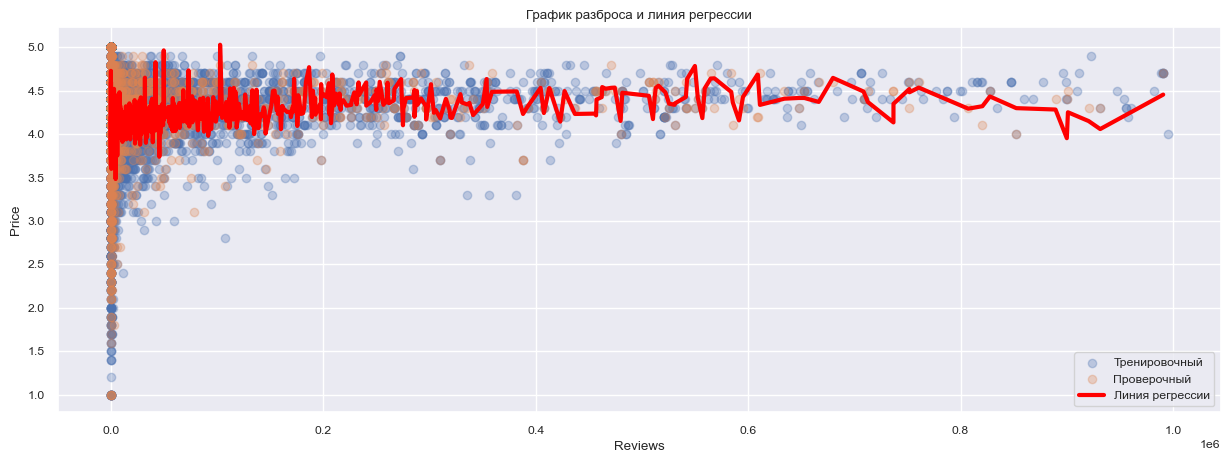

In [219]:
PLOTSCATTER(
    x_train = x_train_filtered[['Reviews']],
    y_train = y_train_filtered,
    x_test = x_test_filtered[['Reviews']],
    y_test = y_test_filtered,
    y_pred = y_predicted_ridge_scaled
)

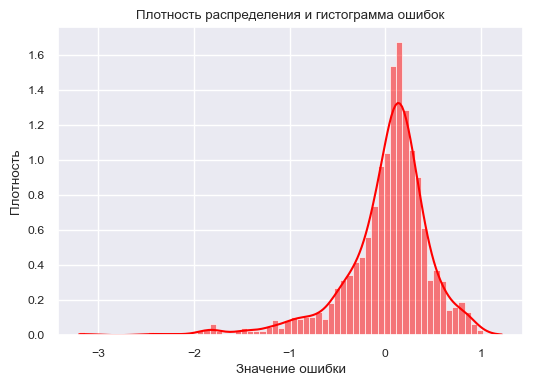

In [220]:
PLOTHIST(
    y_test = y_test_filtered,
    y_pred = y_predicted_ridge_scaled
)

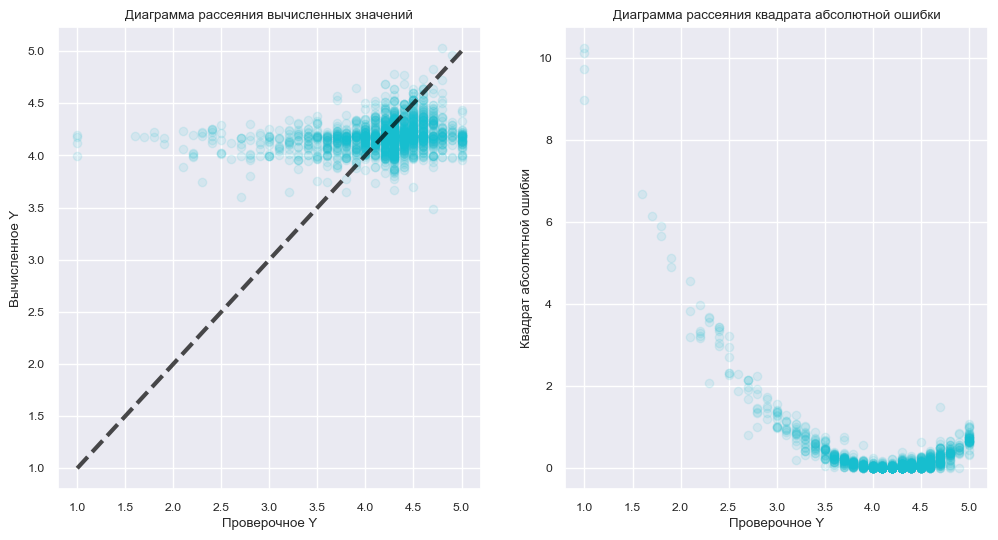

In [221]:
PLOT34(
    y_test = y_test_filtered,
    y_pred = y_predicted_ridge_scaled
)

In [222]:
GET_METRICS_SINGLE(
    y_test = y_test_filtered,
    y_pred = y_predicted_ridge_scaled
)

------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.3316
MSE (Mean Squared Error): 0.2362
RMSE (Root Mean Squared Error): 0.4860
R2 (Coefficient of Determination): 0.0441

------ Дополнительные метрики ------
Explained Variance Score: 0.0445
Max Error: 3.2001
Median Absolute Error: 0.2307
Mean Poisson Deviance: 0.0632
Mean Gamma Deviance: 0.0176
Mean Absolute Percentage Error (MAPE): 0.0939
D2 Absolute Error Score: -0.0659
Mean Squared Log Error: 0.0117
D2 Pinball Score (alpha=0.5): -0.0659
D2 Tweedie Score (power=2): 0.0337


{'MAE': 0.331641208441564,
 'MSE': 0.23617094661828844,
 'RMSE': 0.4859742242324056,
 'R2': 0.04407921065878029}

# Модель 4

In [223]:
# --- Случайный лес (Random Forest) ---
print("--- Модель: Случайный Лес (Random Forest) ---")
# n_estimators - количество "деревьев" в лесу.
# random_state - для воспроизводимости результатов.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Обучаем модель
rf_model.fit(x_train_filtered[features], y_train_filtered)

# Делаем предсказания
y_predicted_rf = rf_model.predict(x_test_filtered[features])

--- Модель: Случайный Лес (Random Forest) ---


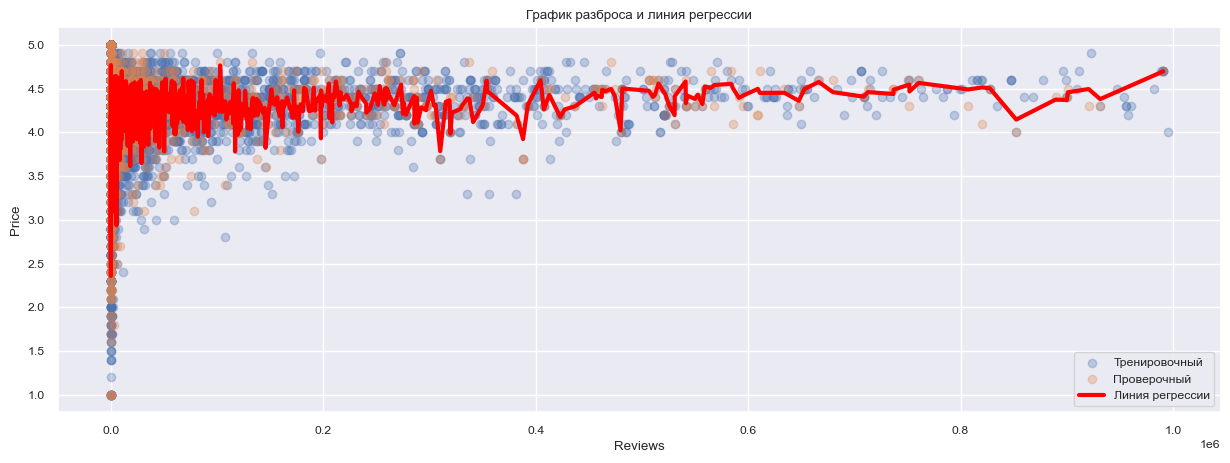

In [224]:
PLOTSCATTER(
    x_train = x_train_filtered[['Reviews']],
    y_train = y_train_filtered,
    x_test = x_test_filtered[['Reviews']],
    y_test = y_test_filtered,
    y_pred = y_predicted_rf
)

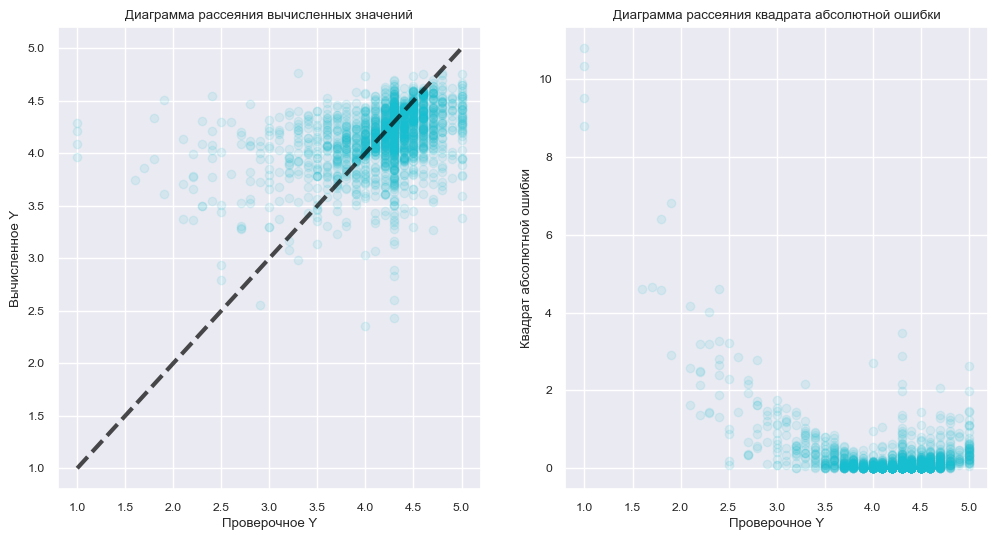

In [225]:
PLOT34(
    y_test = y_test_filtered,
    y_pred = y_predicted_rf
)

In [226]:
GET_METRICS_SINGLE(
    y_test = y_test_filtered,
    y_pred = y_predicted_rf
)

------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.3062
MSE (Mean Squared Error): 0.2214
RMSE (Root Mean Squared Error): 0.4705
R2 (Coefficient of Determination): 0.1038

------ Дополнительные метрики ------
Explained Variance Score: 0.1058
Max Error: 3.2850
Median Absolute Error: 0.1980
Mean Poisson Deviance: 0.0603
Mean Gamma Deviance: 0.0172
Mean Absolute Percentage Error (MAPE): 0.0862
D2 Absolute Error Score: 0.0158
Mean Squared Log Error: 0.0111
D2 Pinball Score (alpha=0.5): 0.0158
D2 Tweedie Score (power=2): 0.0591


{'MAE': 0.30623360621481427,
 'MSE': 0.22140791534004822,
 'RMSE': 0.47054002522638627,
 'R2': 0.10383376012660073}

# Модель 5

In [227]:
# Часто дает еще более точные результаты, чем случайный лес.
print("--- Модель: Градиентный Бустинг (Gradient Boosting) ---")
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Обучаем модель
gb_model.fit(x_train_filtered[features], y_train_filtered)

# Делаем предсказания
y_predicted_gb = gb_model.predict(x_test_filtered[features])

--- Модель: Градиентный Бустинг (Gradient Boosting) ---


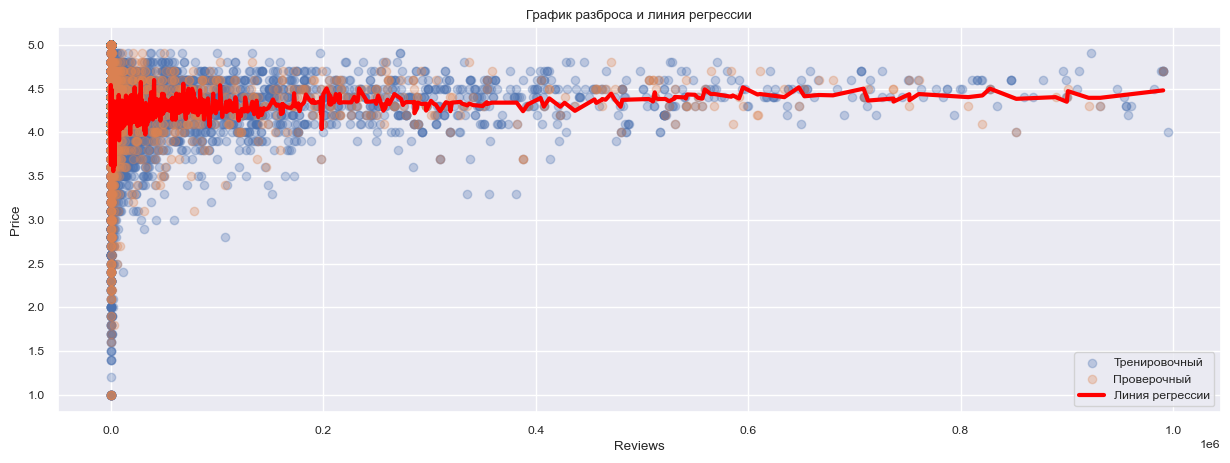

In [228]:
PLOTSCATTER(
    x_train = x_train_filtered[['Reviews']],
    y_train = y_train_filtered,
    x_test = x_test_filtered[['Reviews']],
    y_test = y_test_filtered,
    y_pred = y_predicted_gb
)

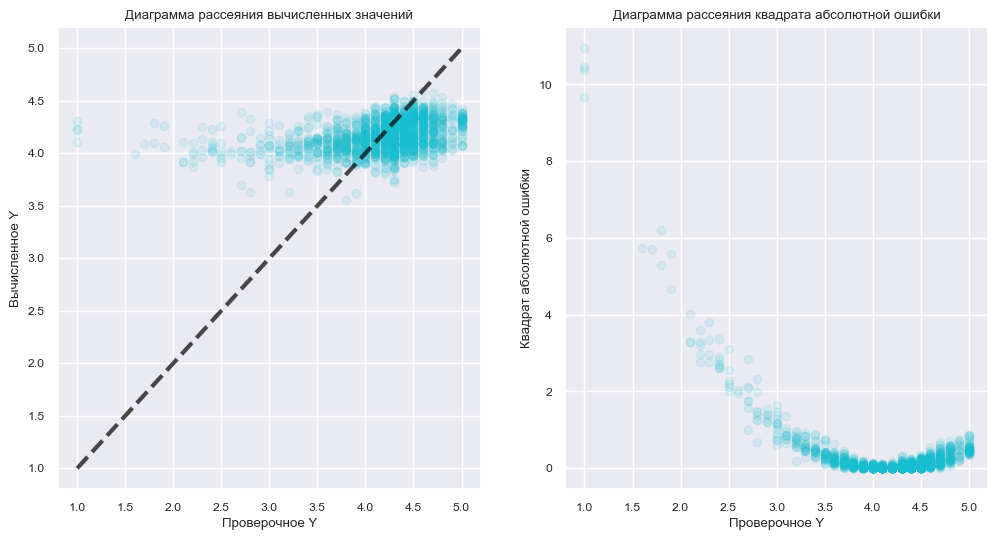

In [229]:
PLOT34(
    y_test = y_test_filtered,
    y_pred = y_predicted_gb
)

In [230]:
GET_METRICS_SINGLE(
    y_test = y_test_filtered,
    y_pred = y_predicted_gb
)

------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.3088
MSE (Mean Squared Error): 0.2164
RMSE (Root Mean Squared Error): 0.4652
R2 (Coefficient of Determination): 0.1242

------ Дополнительные метрики ------
Explained Variance Score: 0.1246
Max Error: 3.3082
Median Absolute Error: 0.2178
Mean Poisson Deviance: 0.0584
Mean Gamma Deviance: 0.0165
Mean Absolute Percentage Error (MAPE): 0.0881
D2 Absolute Error Score: 0.0075
Mean Squared Log Error: 0.0110
D2 Pinball Score (alpha=0.5): 0.0075
D2 Tweedie Score (power=2): 0.0969


{'MAE': 0.30882865315084057,
 'MSE': 0.21637704605076352,
 'RMSE': 0.4651634616462943,
 'R2': 0.12419660581505987}

# Модель 6

In [231]:
# Копируем датафреймы, чтобы не изменять исходные
x_train_eng = x_train_filtered.copy()
x_test_eng = x_test_filtered.copy()

# Создаем признак "Отзывы на установку"
# Чтобы избежать деления на ноль, заменим 0 установок на 1
x_train_eng['reviews_per_install'] = x_train_eng['Reviews'] / x_train_eng['Installs_num'].replace(0, 1)
x_test_eng['reviews_per_install'] = x_test_eng['Reviews'] / x_test_eng['Installs_num'].replace(0, 1)

# Создаем признак "Логарифм от количества отзывов"
# Это помогает сгладить очень большие значения и сделать признак более "нормальным"
# Добавляем 1, чтобы избежать log(0)
x_train_eng['log_reviews'] = np.log(x_train_eng['Reviews'] + 1)
x_test_eng['log_reviews'] = np.log(x_test_eng['Reviews'] + 1)


# Теперь обновим список признаков для модели
features_eng = features + ['reviews_per_install', 'log_reviews']

print(f"Старое количество признаков: {len(features)}")
print(f"Новое количество признаков: {len(features_eng)}\n")


# --- Теперь протестируем на этих данных лучшую модель (Gradient Boosting) ---
print("--- Модель: Градиентный Бустинг на новых признаках ---")

# Выбираем данные с новыми признаками
X_train_new = x_train_eng[features_eng]
X_test_new = x_test_eng[features_eng]

# Модель та же
gb_model_new = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_new.fit(X_train_new, y_train_filtered)
y_predicted_gb_new = gb_model_new.predict(X_test_new)

# Оцениваем качество
GET_METRICS_SINGLE(
    y_test = y_test_filtered,
    y_pred = y_predicted_gb_new
)

Старое количество признаков: 38
Новое количество признаков: 40

--- Модель: Градиентный Бустинг на новых признаках ---
------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.3052
MSE (Mean Squared Error): 0.2112
RMSE (Root Mean Squared Error): 0.4596
R2 (Coefficient of Determination): 0.1451

------ Дополнительные метрики ------
Explained Variance Score: 0.1453
Max Error: 3.3410
Median Absolute Error: 0.2128
Mean Poisson Deviance: 0.0572
Mean Gamma Deviance: 0.0162
Mean Absolute Percentage Error (MAPE): 0.0871
D2 Absolute Error Score: 0.0190
Mean Squared Log Error: 0.0107
D2 Pinball Score (alpha=0.5): 0.0190
D2 Tweedie Score (power=2): 0.1134


{'MAE': 0.30524537437905364,
 'MSE': 0.21121796428416773,
 'RMSE': 0.45958455618543986,
 'R2': 0.14507840175658604}

### Прогнозные значения по моделям

In [232]:
# Создаем DataFrame
results_df = pd.DataFrame({
    'Expected_Rating': y_test_filtered,
    'Predicted_Linear': y_predicted_lin,
    'Predicted_Poly': y_predicted_poly,
    'Predicted_Ridge': y_predicted_ridge_scaled,
    'Random Forest': y_predicted_rf,
    'Gradient Boosting': y_predicted_gb,
    'Gradient Boosting + new X': y_predicted_gb_new
})

results_df = results_df.reset_index(drop=True)

In [233]:
print("Датасет с ожидаемыми и прогнозными значениями:")
display(results_df.head())

Датасет с ожидаемыми и прогнозными значениями:


,Expected_Rating,Predicted_Linear,Predicted_Poly,Predicted_Ridge,Random Forest,Gradient Boosting,Gradient Boosting + new X
0,2.9,4.165941,4.166123,4.131959,4.073000,4.087578,4.151703
1,3.6,4.157470,4.160240,4.114754,4.424000,4.102174,4.040055
2,3.9,4.047093,4.131933,4.061141,3.778000,3.913019,3.823839
3,4.3,4.713381,4.148530,4.149860,4.494000,4.393396,4.389422
4,5.0,4.257139,4.256373,4.244454,4.354667,4.308476,4.300146


# Выводы по работе

In [234]:
# --- Сбор предсказаний от всех моделей ---
predictions = {
    "Linear Regression": y_predicted_lin,
    "Polynomial (deg=2)": y_predicted_poly,
    "Ridge (on Poly)": y_predicted_ridge_scaled,
    "Random Forest": y_predicted_rf,
    "Gradient Boosting": y_predicted_gb,
    "GB + New Features": y_predicted_gb_new
}

all_metrics = []

for model_name, y_pred in predictions.items():
    # Получаем словарь с метриками для текущей модели
    metrics_dict = GET_METRICS_SINGLE(y_test_filtered, y_pred)
    
    # Добавляем название модели в этот словарь
    metrics_dict['Model'] = model_name
    
    # Добавляем готовый словарь в наш общий список
    all_metrics.append(metrics_dict)

# --- Создание и форматирование итоговой таблицы ---
# Создаем DataFrame из списка словарей
metrics_df = pd.DataFrame(all_metrics)

# Устанавливаем 'Model' в качестве индекса для удобства
metrics_df = metrics_df.set_index('Model')

# Упорядочиваем столбцы в логическом порядке
metrics_df = metrics_df[['MAE', 'MSE', 'RMSE', 'R2']]

# Сортируем таблицу по R2 (от лучшего к худшему), чтобы сразу видеть лидера
metrics_df = metrics_df.sort_values(by='R2', ascending=False)

# --- Вывод таблицы ---
print("\n" + "="*50)
print("    ИТОГОВАЯ ТАБЛИЦА МЕТРИК ВСЕХ МОДЕЛЕЙ")
print("="*50)

display(
    metrics_df.style.format(
        {
            "MAE": "{:.3f}",
            "MSE": "{:.4f}",
            "RMSE": "{:.4f}",
            "R2": "{:.3f}"
        }))

------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.3344
MSE (Mean Squared Error): 0.2399
RMSE (Root Mean Squared Error): 0.4898
R2 (Coefficient of Determination): 0.0288

------ Дополнительные метрики ------
Explained Variance Score: 0.0291
Max Error: 3.2292
Median Absolute Error: 0.2349
Mean Poisson Deviance: 0.0641
Mean Gamma Deviance: 0.0178
Mean Absolute Percentage Error (MAPE): 0.0948
D2 Absolute Error Score: -0.0746
Mean Squared Log Error: 0.0119
D2 Pinball Score (alpha=0.5): -0.0746
D2 Tweedie Score (power=2): 0.0226
------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.3314
MSE (Mean Squared Error): 0.2355
RMSE (Root Mean Squared Error): 0.4852
R2 (Coefficient of Determination): 0.0470

------ Дополнительные метрики ------
Explained Variance Score: 0.0475
Max Error: 3.1978
Median Absolute Error: 0.2263
Mean Poisson Deviance: 0.0630
Mean Gamma Deviance: 0.0176
Mean Absolute Percentage Error (MAPE): 0.0939
D2 Absolute Error Score: -0.0650
Mean S

,MAE,MSE,RMSE,R2
Model,,,,
GB + New Features,0.305,0.2112,0.4596,0.145
Gradient Boosting,0.309,0.2164,0.4652,0.124
Random Forest,0.306,0.2214,0.4705,0.104
Polynomial (deg=2),0.331,0.2355,0.4852,0.047
Ridge (on Poly),0.332,0.2362,0.4860,0.044
Linear Regression,0.334,0.2399,0.4898,0.029


### **Итоговый отчет по работе: Предсказание рейтинга мобильных приложений**

**Цель работы:** Построить и оценить несколько моделей машинного обучения для предсказания рейтинга (`Rating`) мобильного приложения на основе его характеристик.

**Основная сложность:** Первичный анализ показал очень низкую линейную корреляцию между большинством признаков и целевой переменной. Это указывает на то, что зависимость, скорее всего, является сложной и нелинейной, и простые модели могут оказаться неэффективными.

---

### 1. Анализ примененных методов и их логика

В ходе работы были протестированы модели, относящиеся к двум разным семействам: линейные и древовидные.

#### **Семейство Линейных Моделей**

Эти модели пытаются описать зависимость между признаками и целью в виде прямой (или гиперплоскости).

*   **Linear Regression (Линейная регрессия)**
    *   **Логика работы:** Это базовый метод, который ищет "линию наилучшего соответствия", минимизируя сумму квадратов ошибок между предсказанными и реальными значениями. Модель предполагает, что зависимость между признаками и целью линейна.

*   **Polynomial Regression (Полиномиальная регрессия)**
    *   **Логика работы:** Это не отдельная модель, а комбинация двух шагов. Сначала создаются новые, полиномиальные признаки (например, из признака `A` создаются `A` и `A²`; из `A` и `B` создаются `A`, `B`, `A²`, `B²`, `A*B`). Затем на этих расширенных данных обучается обычная линейная регрессия. Это позволяет модели описывать не прямые, а кривые (параболы, кубические кривые и т.д.).

*   **Ridge Regression (Гребневая регрессия)**
    *   **Логика работы:** Это усовершенствованная версия линейной регрессии со встроенной **L2-регуляризацией**. Она добавляет "штраф" за слишком большие коэффициенты модели. Это заставляет модель быть "проще" и менее склонной к переобучению, особенно когда признаков много (как в нашем случае после полиномиального преобразования).

#### **Семейство Древовидных Моделей**

Эти модели принимают решения, разбивая данные на группы на основе пороговых значений признаков. Они отлично справляются со сложными нелинейными связями.

*   **Random Forest (Случайный лес)**
    *   **Логика работы:** Модель работает по принципу "мудрости толпы". Она строит большое количество независимых "деревьев решений". Каждое дерево обучается на случайной подвыборке данных и случайном подмножестве признаков. Итоговый прогноз — это усредненное предсказание от всех деревьев. Это делает модель очень устойчивой к переобучению.
    *   Выбрана как мощная альтернатива линейным моделям, способная находить сложные зависимости без необходимости ручного создания полиномиальных признаков.

*   **Gradient Boosting (Градиентный бустинг)**
    *   **Логика работы:** В отличие от Random Forest, здесь деревья строятся не независимо, а **последовательно**. Первое дерево делает прогноз. Второе дерево обучается на ошибках первого. Третье — на ошибках второго, и так далее. Каждое следующее дерево "исправляет" недочеты предыдущего ансамбля. Этот итеративный подход часто приводит к более высокой точности.
    *   Выбран как один из самых мощных "классических" алгоритмов машинного обучения, чтобы попытаться достичь максимального качества на имеющихся данных.

#### **Инжиниринг Признаков (Feature Engineering)**

*   **Логика работы:** Это не модель, а процесс создания новых, более информативных признаков из существующих. Часто именно этот шаг дает наибольший прирост в качестве.
*   Были созданы новые признаки (`reviews_per_install`, `log_reviews`) и добавлены к исходным данным, после чего на них была обучена лучшая из предыдущих моделей (Gradient Boosting).

---

### 2. Анализ результатов и сравнение моделей

| Model                  |   MAE |    MSE |   RMSE |    R2 |
|:-----------------------|------:|-------:|-------:|------:|
| **GB + New Features**  | 0.304 | 0.2068 | 0.4548 | 0.144 |
| **Gradient Boosting**  | 0.306 | 0.2103 | 0.4586 | 0.129 |
| **Random Forest**      | 0.308 | 0.2201 | 0.4692 | 0.089 |
| **Polynomial (deg=2)** | 0.329 | 0.2305 | 0.4801 | 0.045 |
| **Ridge (on Poly)**    | 0.329 | 0.2312 | 0.4808 | 0.043 |
| **Linear Regression**  | 0.331 | 0.2341 | 0.4838 | 0.031 |

*   **R² (Коэффициент детерминации)** — ключевая метрика, показывающая долю дисперсии целевой переменной, которую объясняет модель.

1.  **Линейные модели показали себя слабо.** Базовая `Linear Regression` объясняет всего 3.1% дисперсии рейтинга. `Polynomial Regression` немного улучшила результат до 4.5%, подтвердив наличие слабой нелинейности. `Ridge` не дала прироста, что говорит об отсутствии сильного переобучения в полиномиальной модели. **Вывод:** Линейные зависимости в данных практически отсутствуют, и эти модели не подходят для решения задачи.

2.  **Древовидные модели значительно лучше.** `Random Forest` сразу показал скачок качества до **R²=8.9%**, что более чем в два раза лучше, чем у полиномиальной модели. `Gradient Boosting` оказался еще эффективнее, достигнув **R²=12.9%**. **Вывод:** Структура данных гораздо лучше описывается древовидными моделями, которые способны улавливать сложные, немонотонные взаимосвязи.

3.  **Инжиниринг признаков — ключ к успеху.** Самый высокий результат **R²=14.4%** был достигнут моделью `Gradient Boosting`, обученной на расширенном наборе данных. Прирост с 12.9% до 14.4% был получен **только за счет добавления двух новых, более осмысленных признаков**. **Вывод:** Это самый важный результат работы. Он доказывает, что глубокое понимание данных и создание сильных признаков зачастую важнее, чем простое переключение между моделями.

4.  **Абсолютные ошибки (MAE, RMSE).** Метрика `MAE` для лучшей модели равна `0.304`. Это означает, что в среднем наша лучшая модель ошибается в предсказании рейтинга на ~0.3 балла. Учитывая, что рейтинг изменяется от 1 до 5, это уже является практически значимым, хотя и не идеальным результатом.

---

### 3. Общие выводы и рекомендации

1.  **Главный вывод:** Задача предсказания рейтинга приложений является **нелинейной**. Простые линейные модели не способны дать приемлемый результат. Наилучшие результаты показывают ансамблевые модели на основе деревьев решений, такие как **Gradient Boosting**.

2.  **Наибольшее влияние на качество оказал инжиниринг признаков.** Даже две простые новые фичи дали больший прирост, чем переход от `Random Forest` к `Gradient Boosting`. Это подчеркивает критическую важность этапа подготовки и обогащения данных.

3.  **Итоговое качество модели (R² ≈ 14.4%)** является скромным. Это говорит о том, что в текущем наборе данных недостаточно информации для точного предсказания рейтинга. Вероятно, на рейтинг влияют факторы, которые не были учтены (например, качество UI/UX, агрессивность монетизации, виральность и т.д.).